# Vehículos Ligeros en México

Datos: Registro administrativo de la industria automotriz de vehículos ligeros, INEGI

Frecuencia: Mensual

Periodo: 2005 Enero, 2019 Octubre


## Ajuste Estacional

Elaboración: Subsecretaría de Industria, Comercio y Competitividad, Secretaría de Economía, con datos del INEGI. 

Pedro José Martínez Alanis

<pedro.martinez@economia.gob.mx>

Actualización: Noviembre 22, 2019

In [1]:
# library 
Packages <- c("tidyverse","lubridate","ggplot2", "dplyr", "seasonal", "ggseas", "ggfortify", "forecast", "mFilter", "plotly")
suppressMessages(invisible(lapply(Packages, library, character.only=TRUE)))
#set strings as factors to false 
options(stringsAsFactors=FALSE)
#search()

In [2]:
# raw data 
    rawdata <- read_csv("data/veh_lig.csv", col_types = cols() )
    rawdata <- data.frame(mutate(rawdata, time = make_date(year, mes) ))
    raw_list <- names(rawdata)
    remove <- c(raw_list[1], raw_list[2], raw_list[189])
    var_list <- raw_list[! raw_list %in% remove]
# ts data
    wrk <- ts(as_tibble(rawdata), frequency=12, start=c(2005,1), end=c(2019,10))
    rm(remove, raw_list)

In [3]:
# autos_sa: ajuste estacional + hp | output: vp-variable plot, vd-variable decomposition

autos_sa <- function(var,db,vti,vsub,vfuente,units,vunits){
    
    vdb <- ts(as_tibble(db[,var]), frequency=12, start=c(2005,1), end=c(2019,10) )
    vsa <- seas(vdb)
    #vsa$model$arima

    suppressMessages(
    vd <- autoplot(decompose(vdb/units))  + 
            labs( title = vti, 
                 subtitle = vsub, 
                 x = "", 
                 y = vunits, 
                 caption=paste("Fuente: Elaboración Secretaría de Economía con datos del ",vfuente,sep="")
            )  + 
            scale_x_continuous(breaks=seq(from=2005, to=2020, by=2)) +
            theme_bw()
    )

    vfigname <- paste("fig/autos/vd_",var,sep="")
    vfigname <- paste(vfigname,".png", sep="")
    ggsave(filename=vfigname, plot = vd, width=18,height=12,units="cm")
    rm(vfigname)

    vhp <- hpfilter(vsa$data[,"seasonaladj"])
    
    vplotd <- ts(
        mutate(as_tibble(vsa$data), 
               hp = vhp$trend, 
               vraw = db[,var], 
               year = db[,"year"], 
               mes=db[,"mes"], 
               time = make_date(year,mes)
              ), frequency=12, start=c(2005,1), end=c(2019,10)
                    )
    
    #vp: variable plot
    vp <- autoplot(vplotd[,c("vraw", "seasonaladj", "trend", "hp")]/units, size=.8) + 
            labs( title = vti, 
                 subtitle = vsub, 
                 x = "", 
                 y = vunits, 
                 caption=paste("Fuente: Elaboración Secretaría de Economía con datos del ",vfuente,sep="")
            ) + 
            scale_x_continuous(breaks=seq(from=2005, to=2020, by=2)) + 
            scale_linetype_manual(
                values = c("solid", "solid", "dotdash", "dashed")
            ) +
            theme_bw() + 
            theme(
                plot.title = element_text(hjust=0.5),
                plot.subtitle = element_text(hjust=0.5),
                legend.position="bottom", 
                plot.caption = element_text(hjust=0)
            ) + 
            scale_colour_manual(
                values=c("grey", "blue","red", "black"), 
                name="", 
                labels=c("Serie original", "Serie desestacionalizada", "Tendencia-ciclo", "Filtro Hodrick–Prescott") 
            )

    vfigname <- paste("fig/autos/vp_",var,sep="")
    vfigname <- paste(vfigname,".png", sep="")

    ggsave(filename=vfigname, plot = vp, width=18,height=12,units="cm")

    #plot data: vcsvd 
    vcsvd <- subset(data.frame(vplotd), select=c("year","mes","vraw","seasonaladj","trend","hp"))
    names(vcsvd)[3] <- var
    names(vcsvd)[4] <- paste0(var,"_sa")
    names(vcsvd)[5] <- paste0(var,"_tr")
    names(vcsvd)[6] <- paste0(var,"_hp")

    vpath <- paste("output/autos/plot_",var,sep="")
        csvpath <- paste(vpath,".csv", sep="")
        write_csv(vcsvd, path=csvpath)
    
    rm(var, db, vdb, vsa, vhp, vplotd, vpath,csvpath, vfigname)
    return(list(vp, vd))
}


## Ventas de vehículos ligeros en México

[[1]]

[[2]]


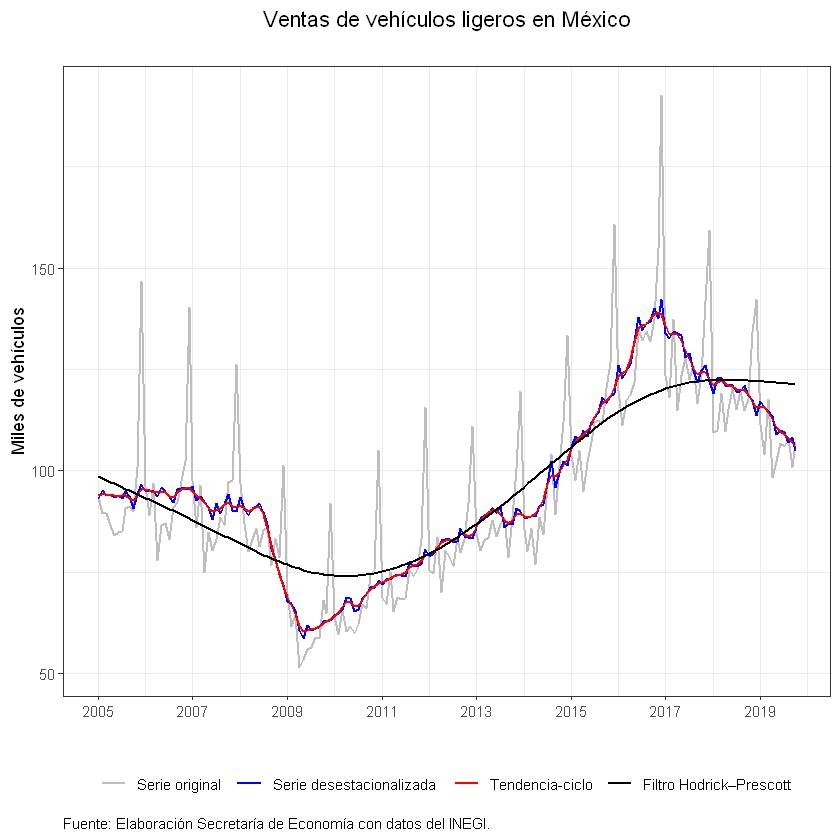

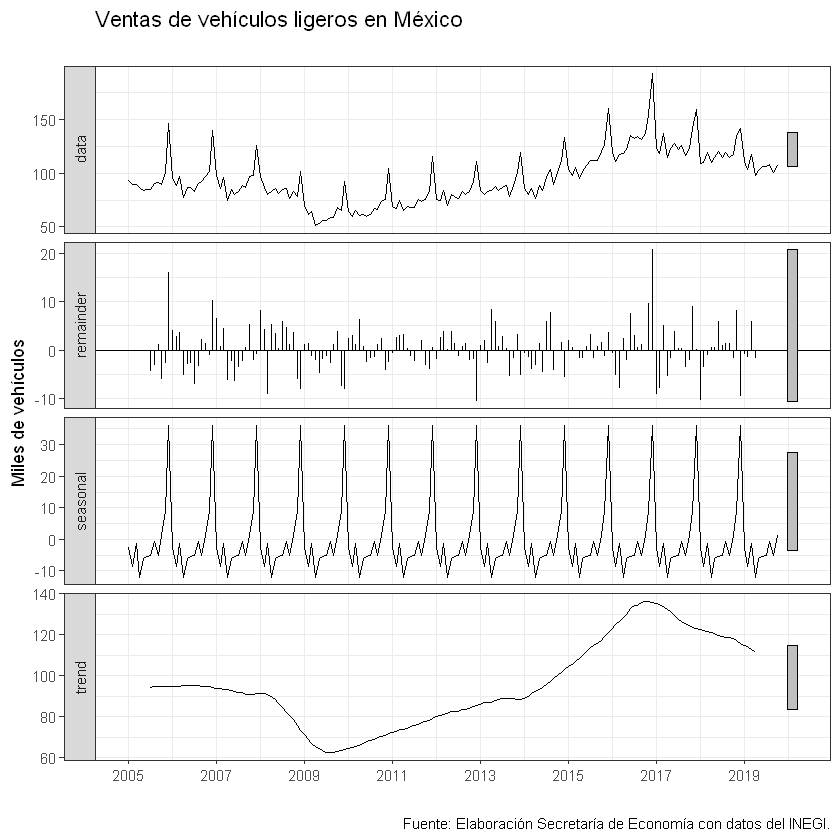

In [4]:
var <- "qv"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- ""
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


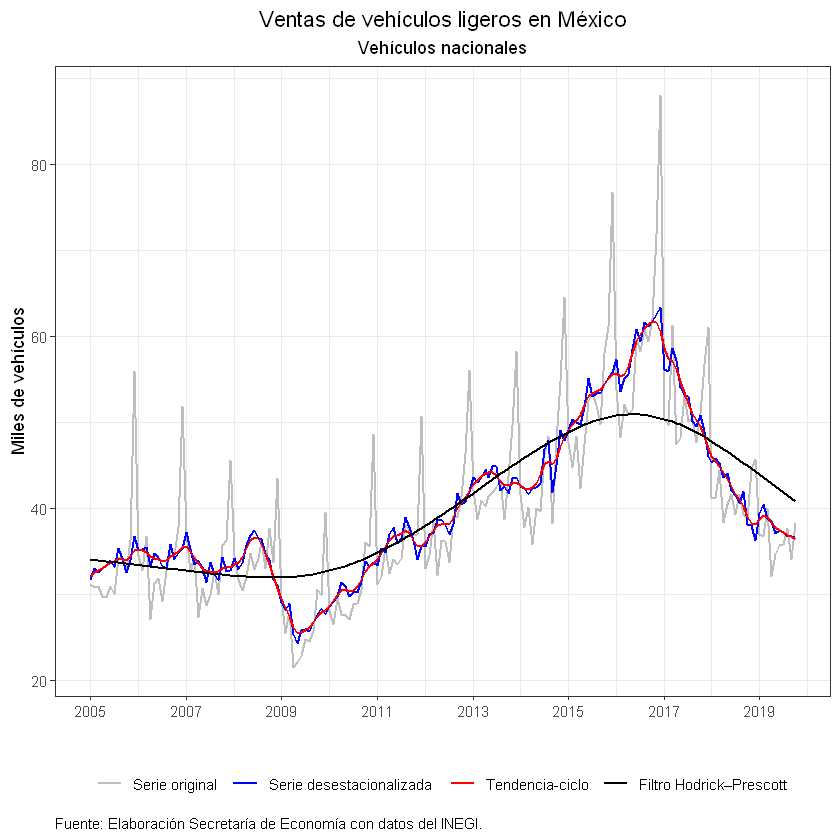

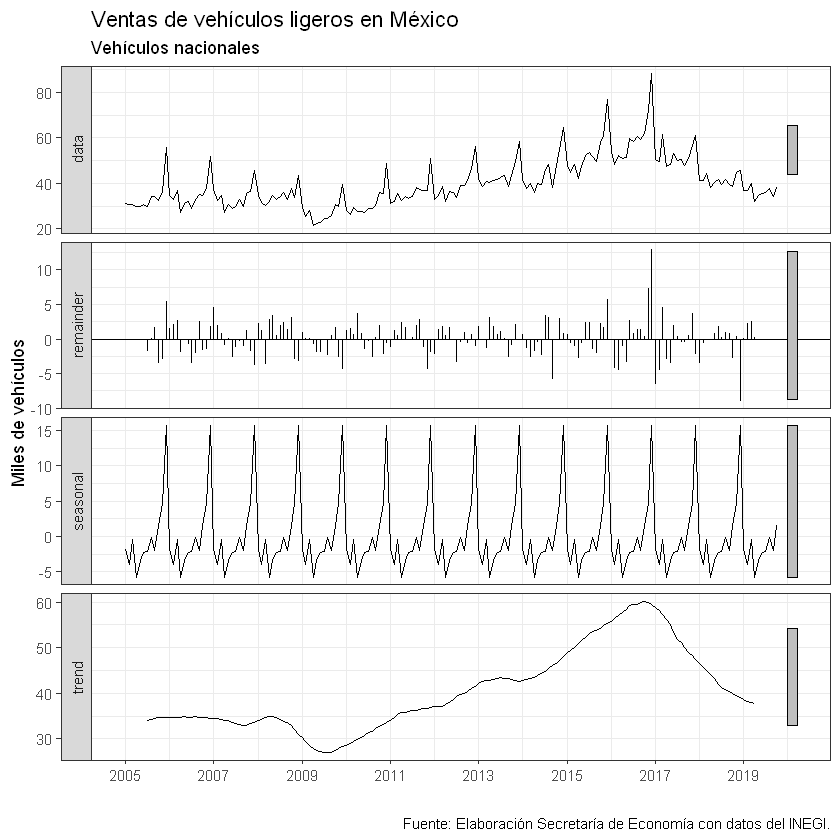

In [5]:
var <- "qv_mex"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Vehículos nacionales"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


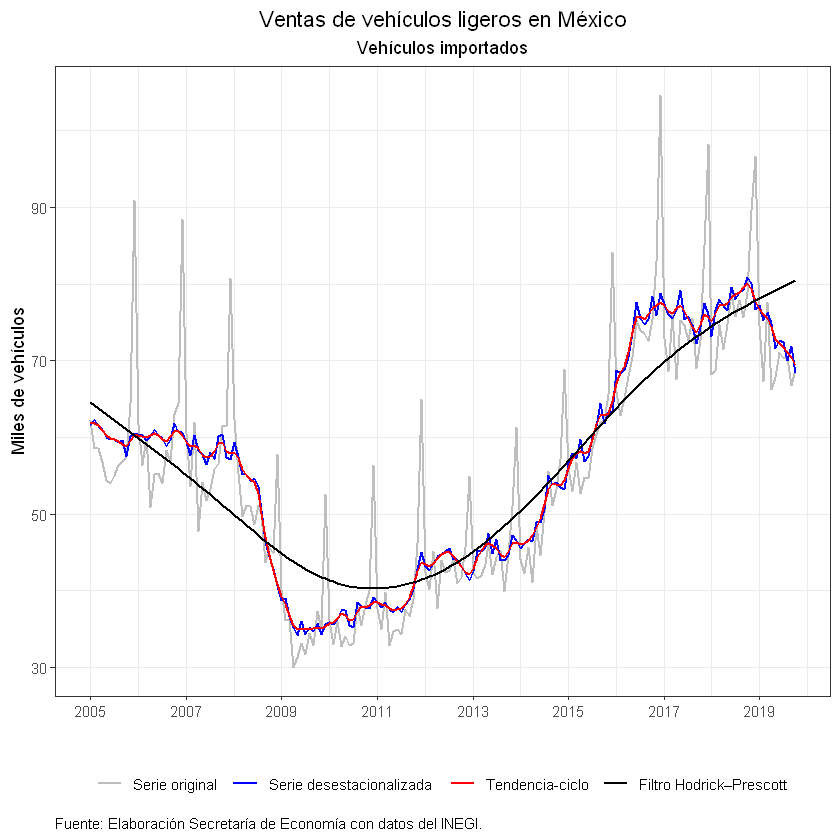

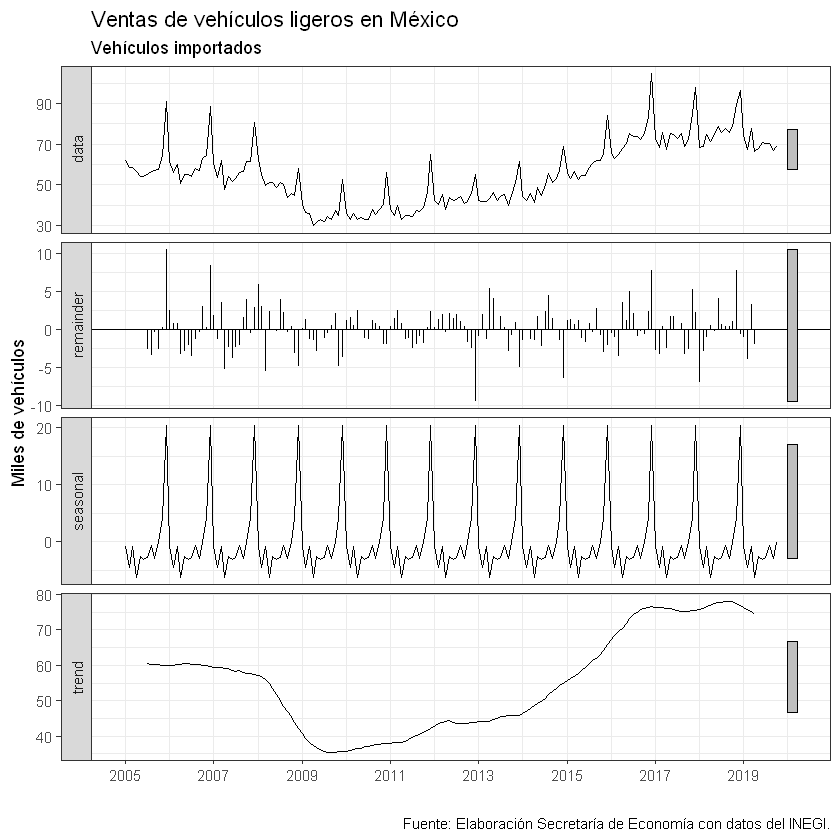

In [6]:
var <- "qv_imp"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Vehículos importados"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


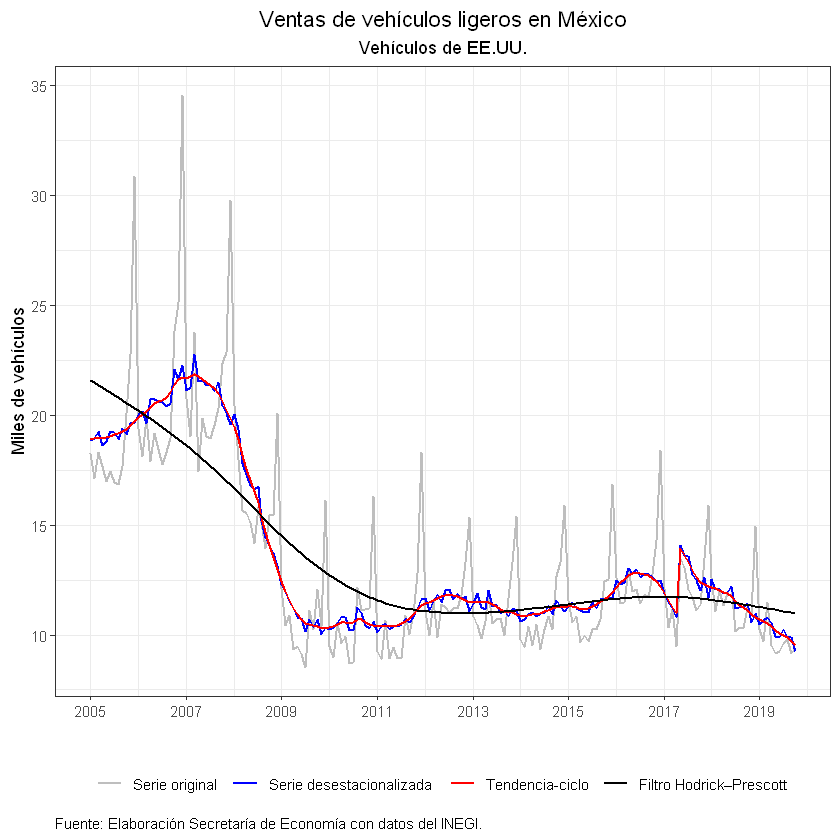

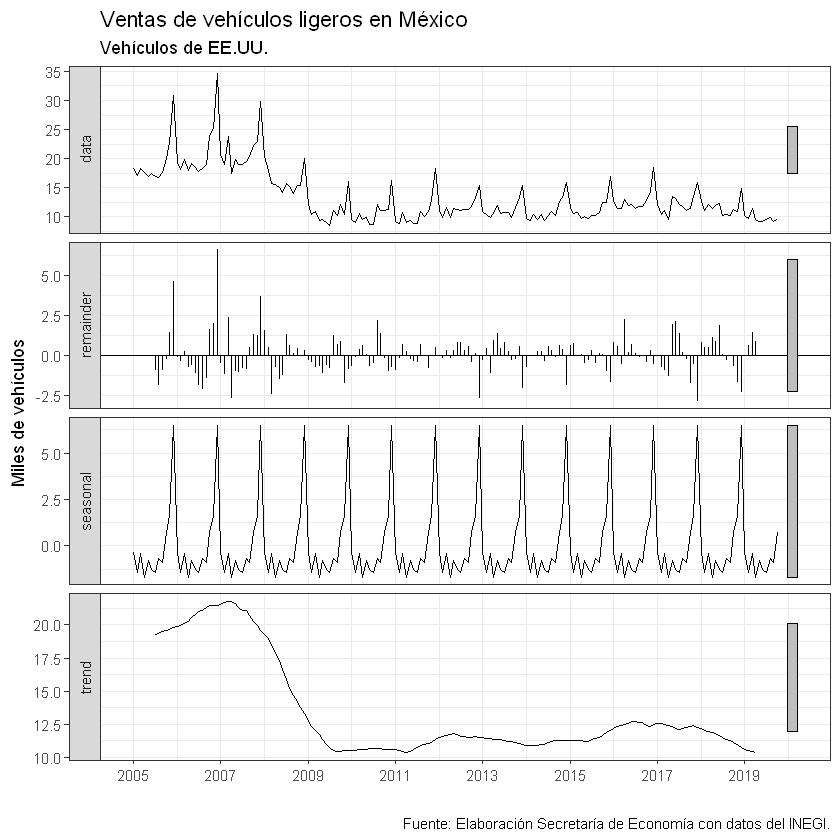

In [7]:
var <- "qv_usa"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Vehículos de EE.UU."
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


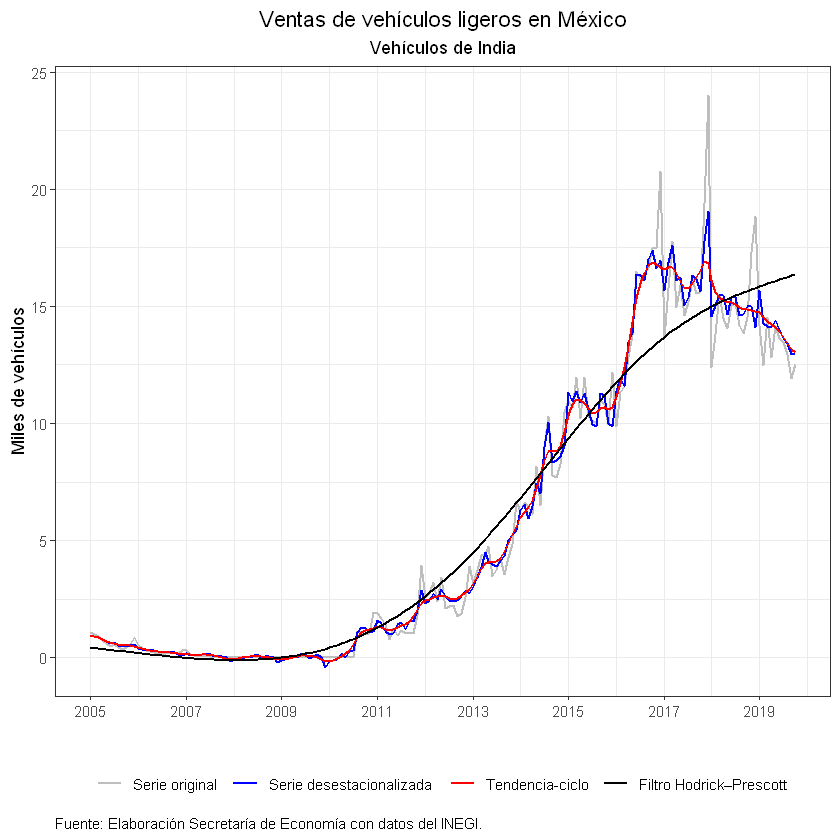

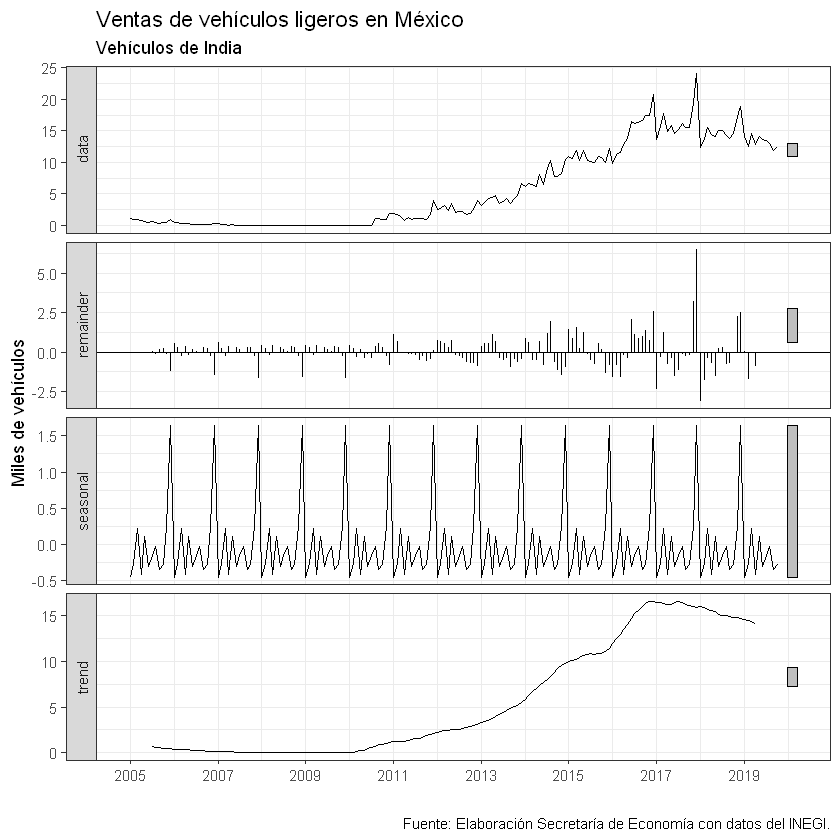

In [8]:
var <- "qv_ind"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Vehículos de India"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


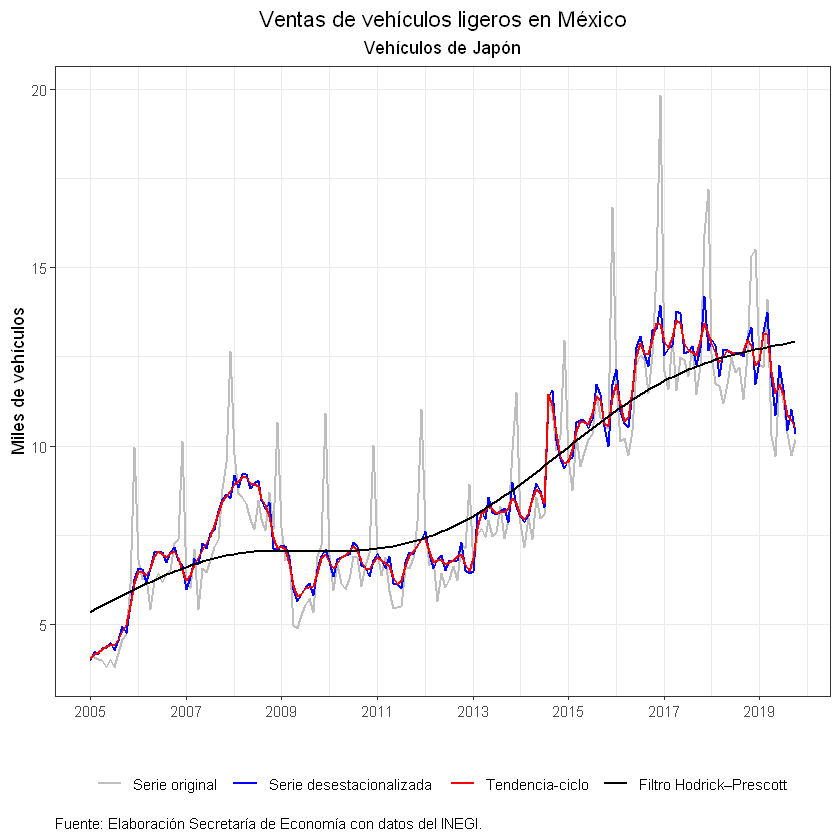

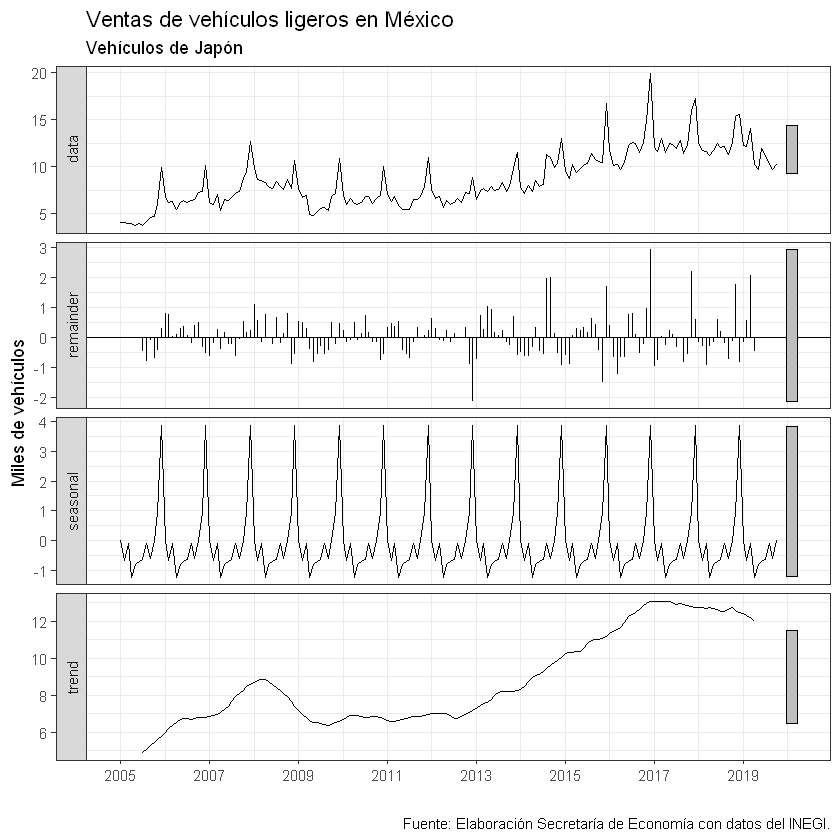

In [9]:
var <- "qv_jpn"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Vehículos de Japón"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

Model used in SEATS is different: (1 1 2)(0 1 1)


[[1]]

[[2]]


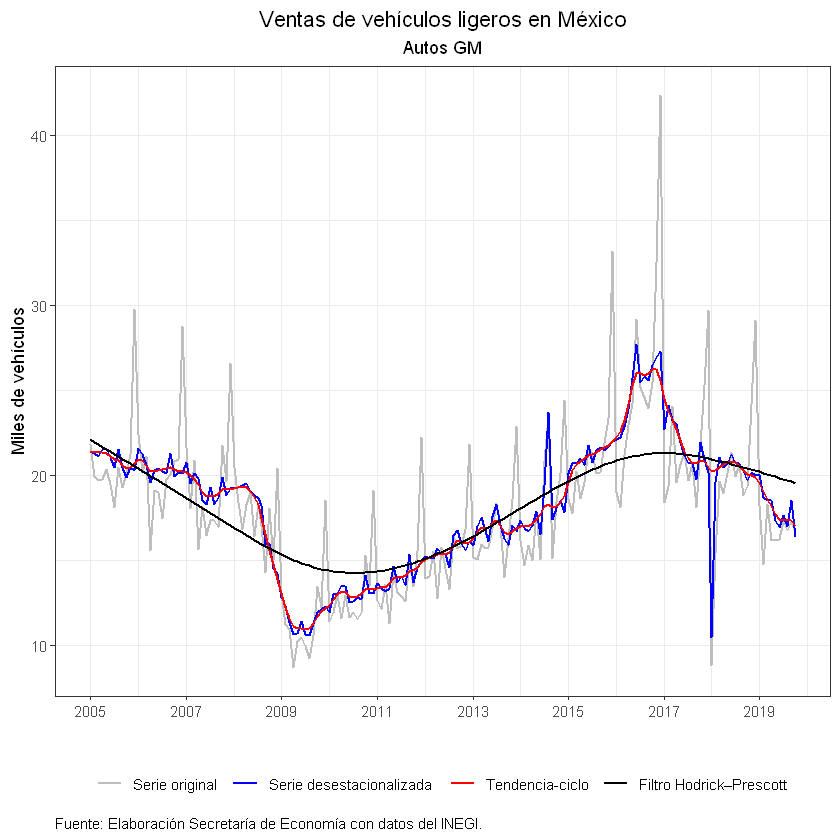

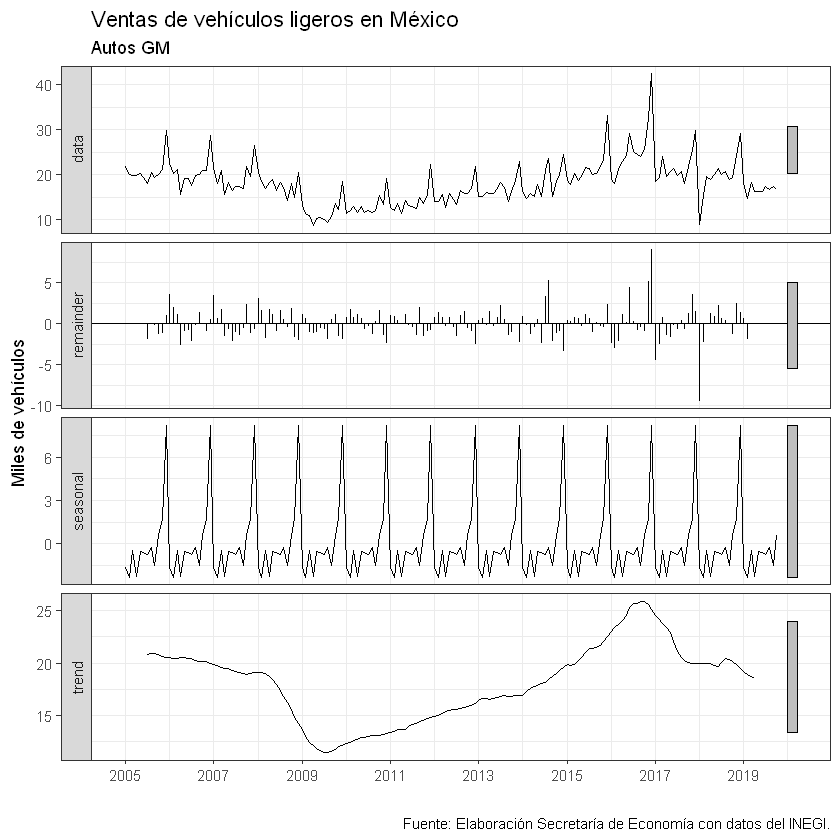

In [10]:
var <- "qv_gm"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos GM"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


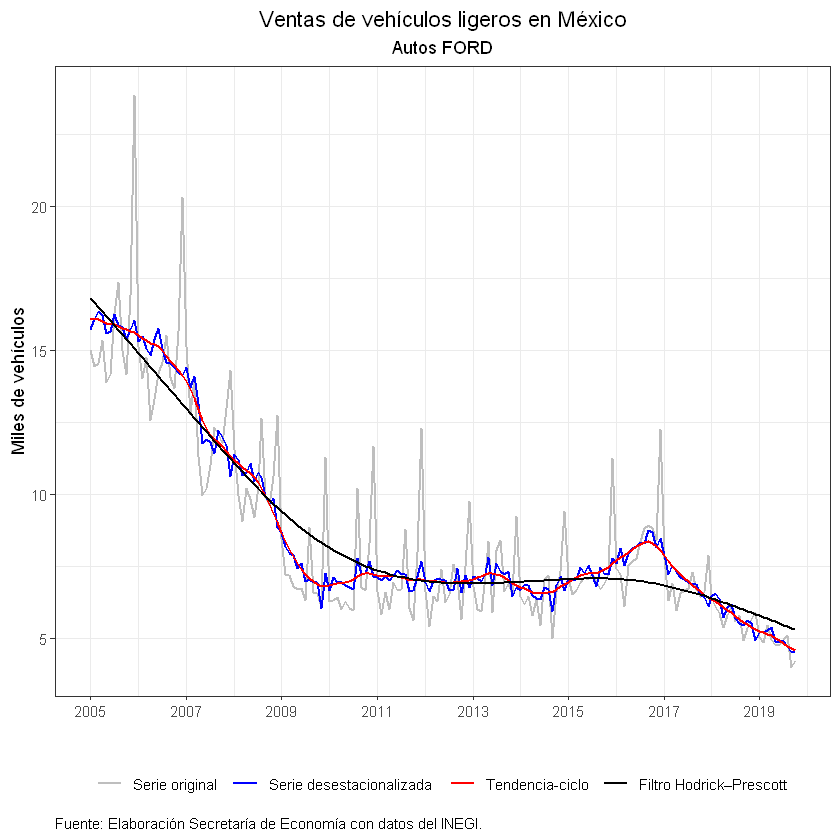

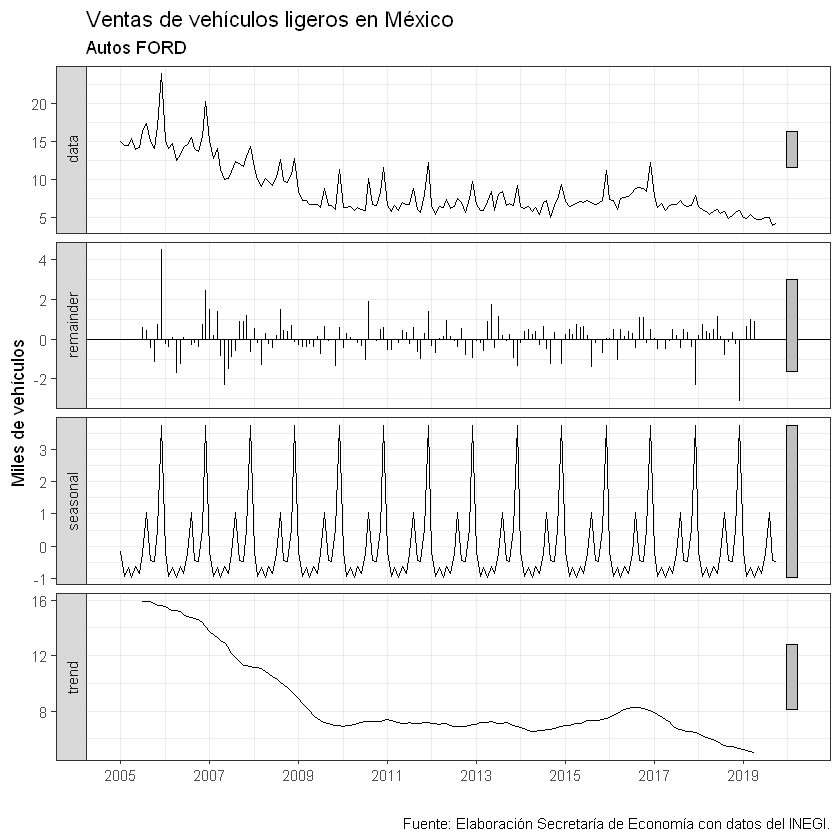

In [11]:
var <- "qv_ford"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos FORD"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


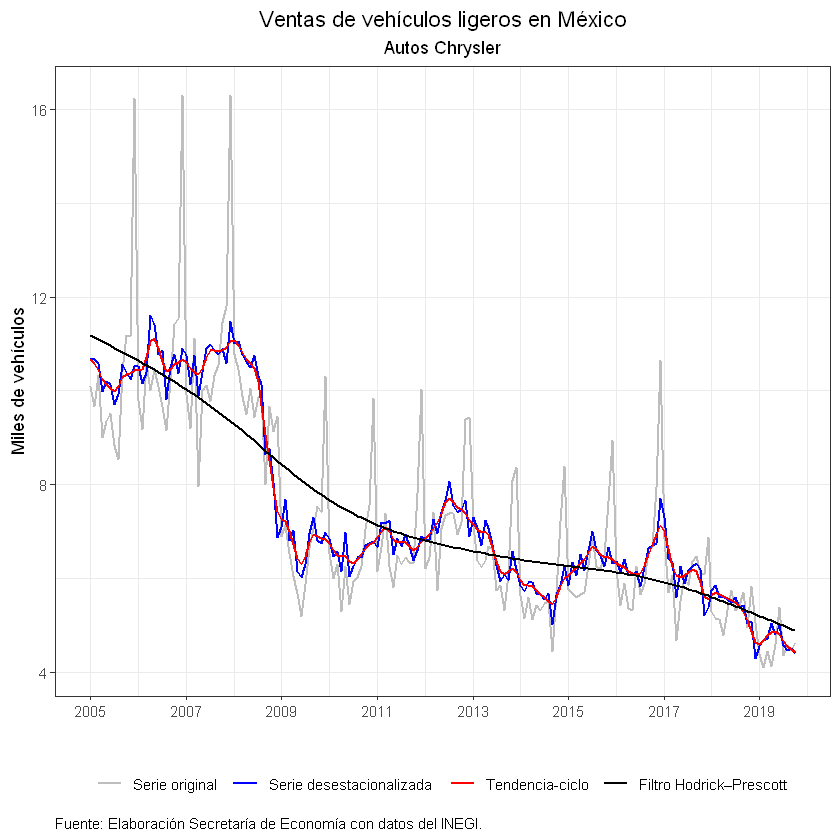

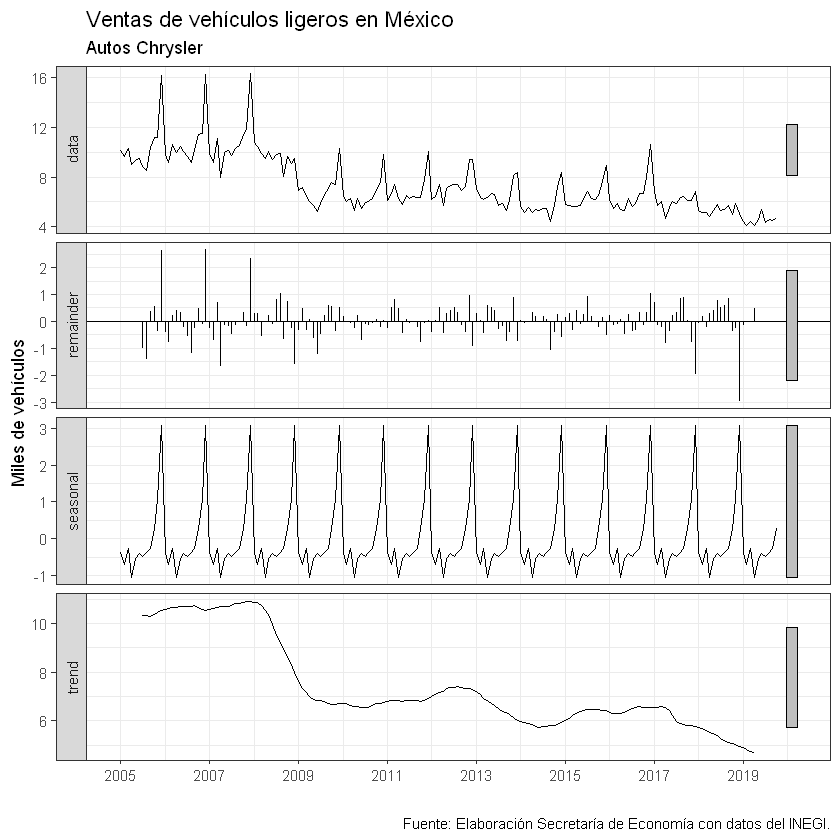

In [12]:
var <- "qv_fca"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos Chrysler"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


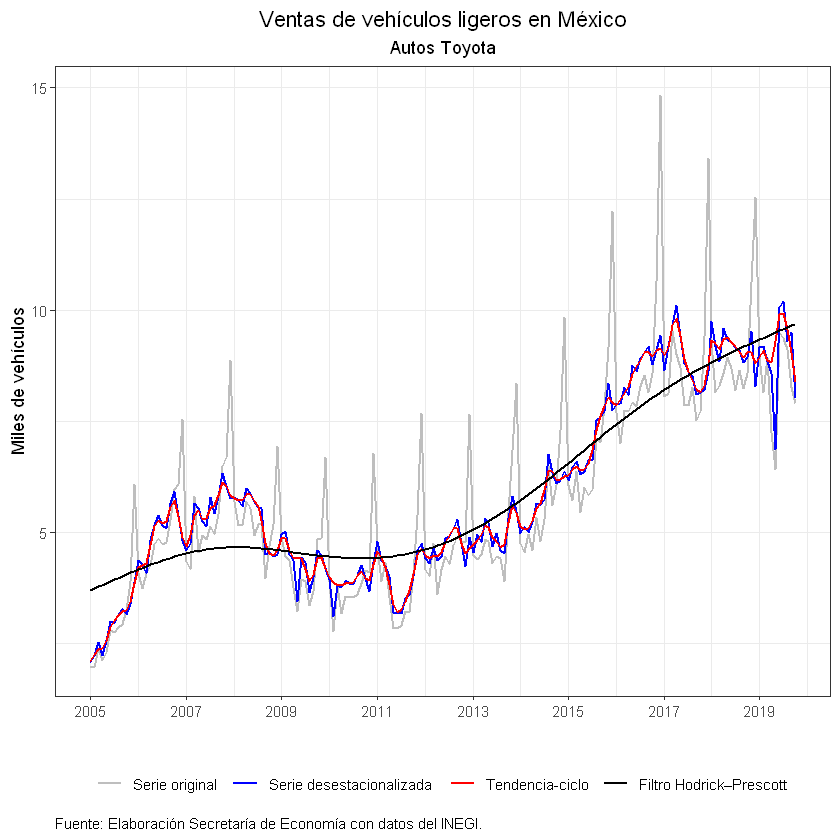

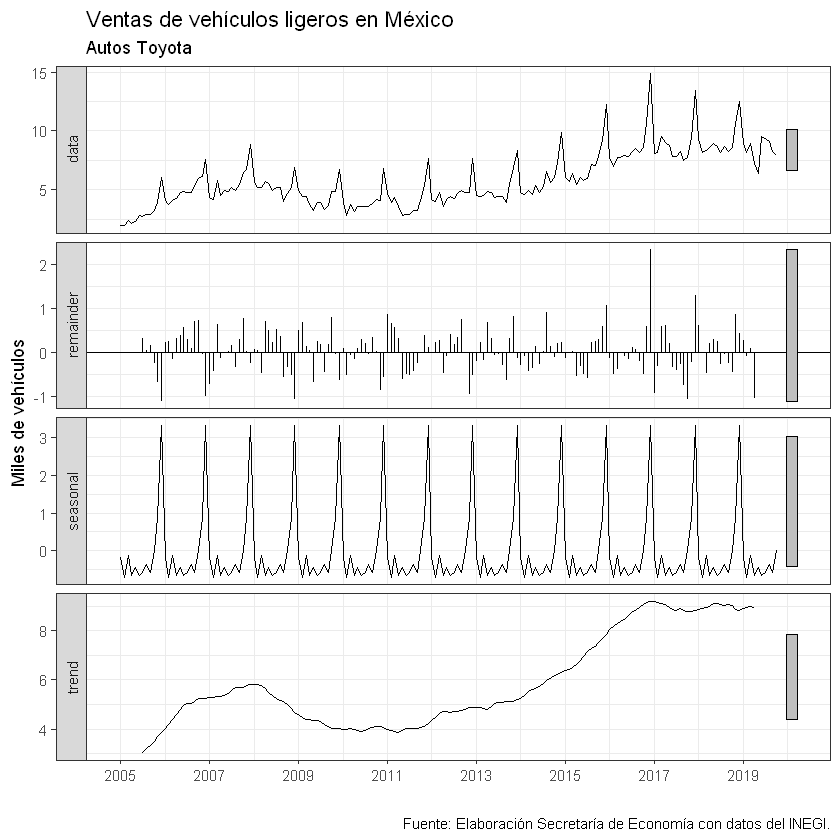

In [13]:
var <- "qv_tyo"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos Toyota"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


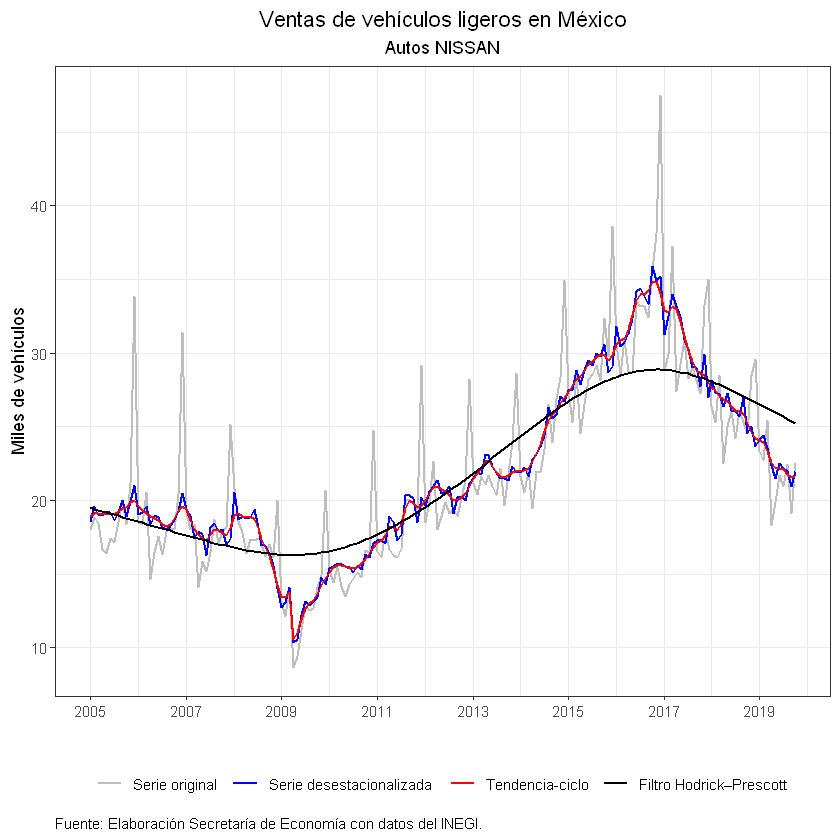

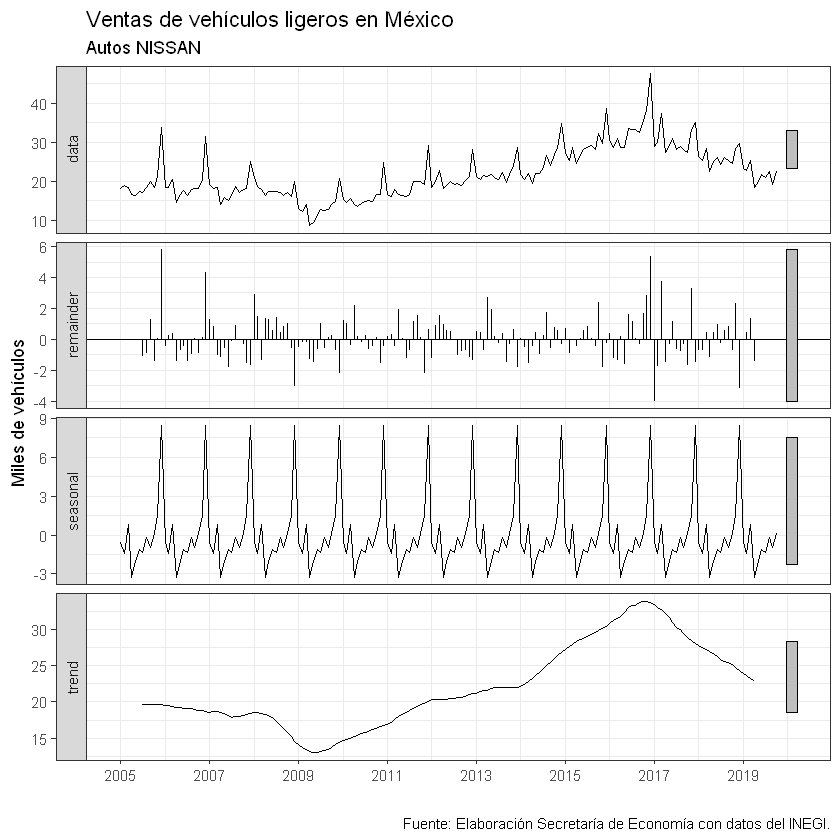

In [14]:
var <- "qv_nsa"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos NISSAN"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


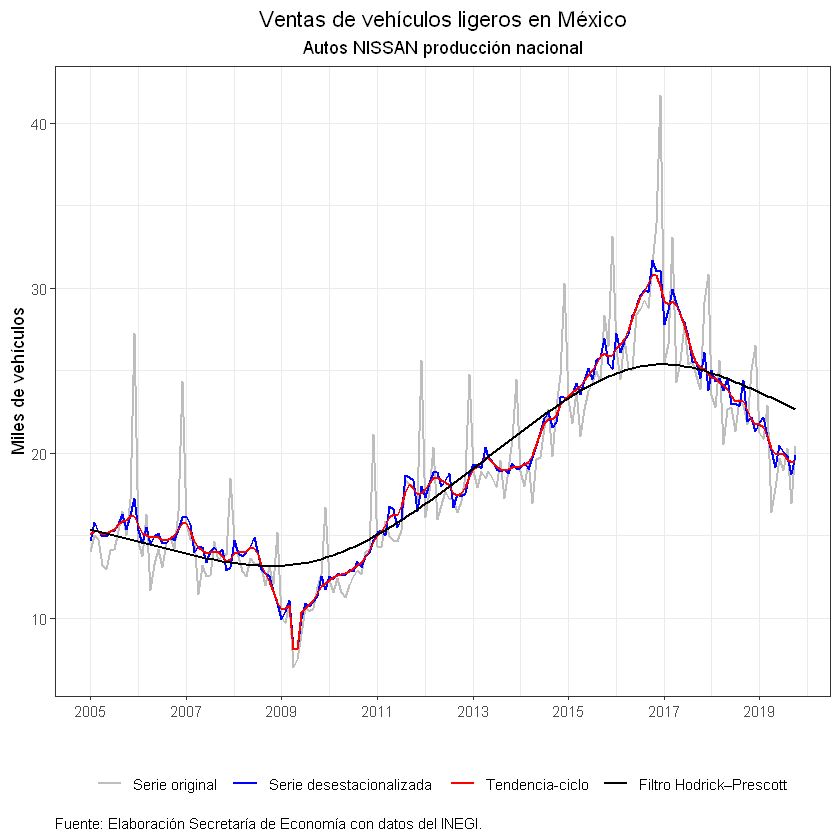

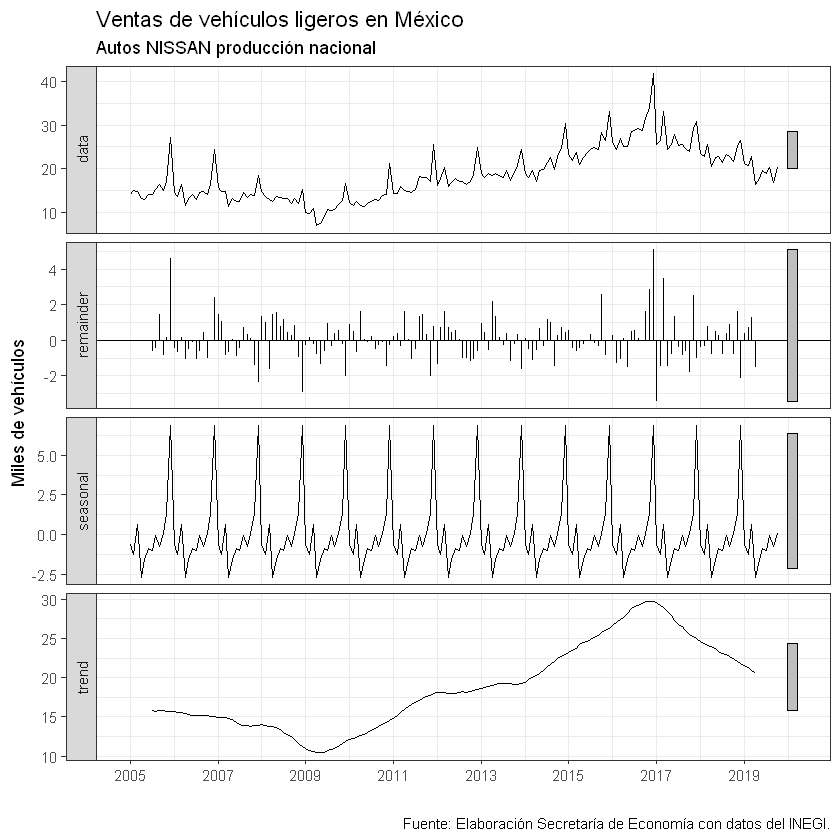

In [15]:
var <- "qv_nsa_nal"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos NISSAN producción nacional"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


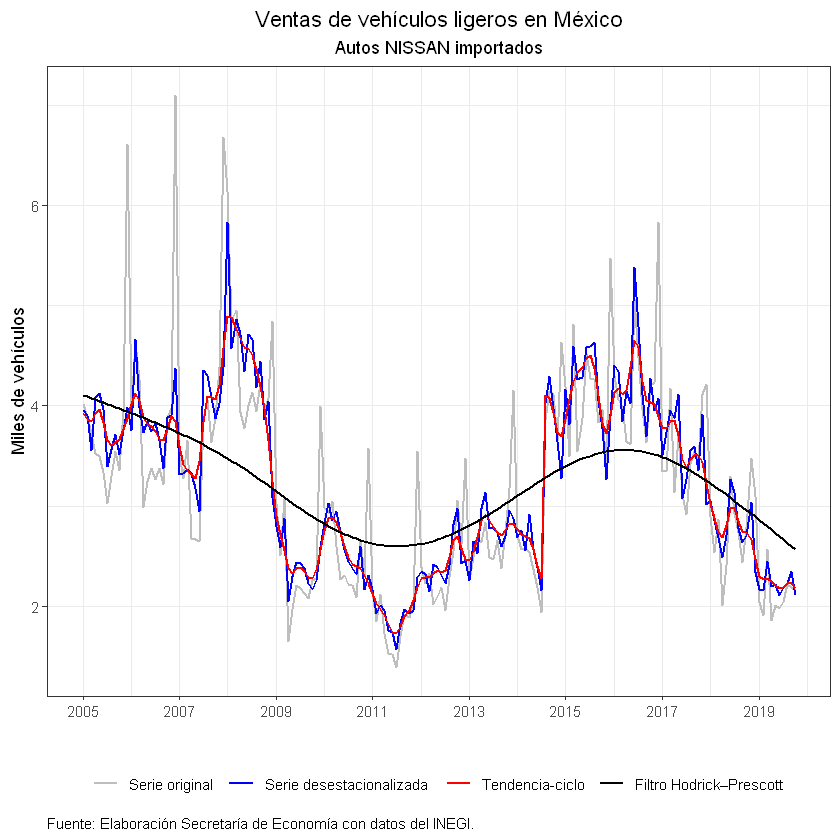

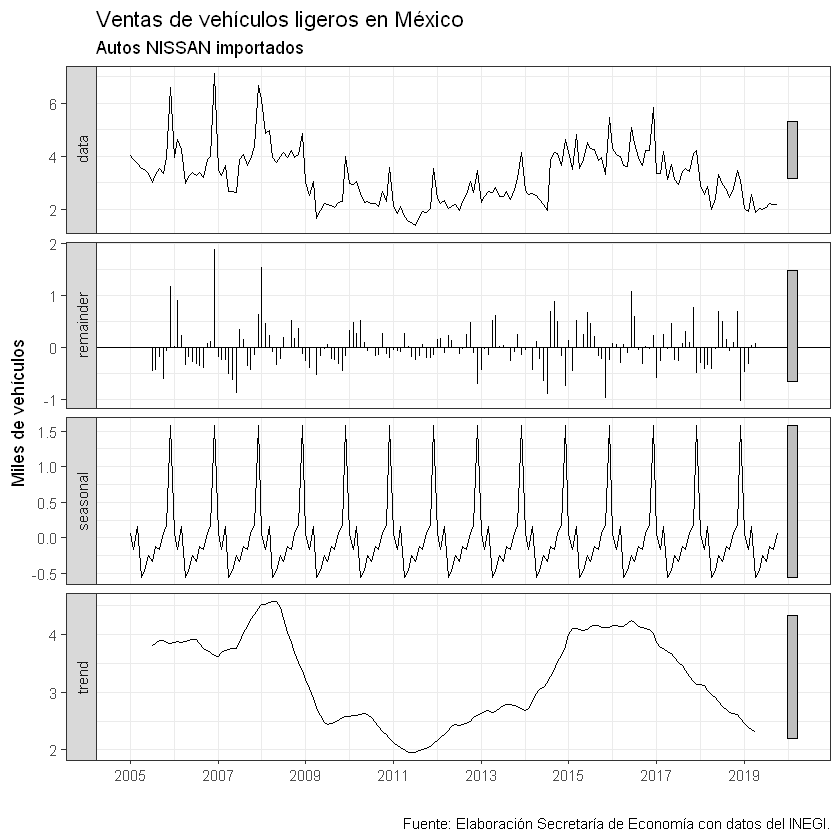

In [16]:
var <- "qv_nsa_imp"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos NISSAN importados"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


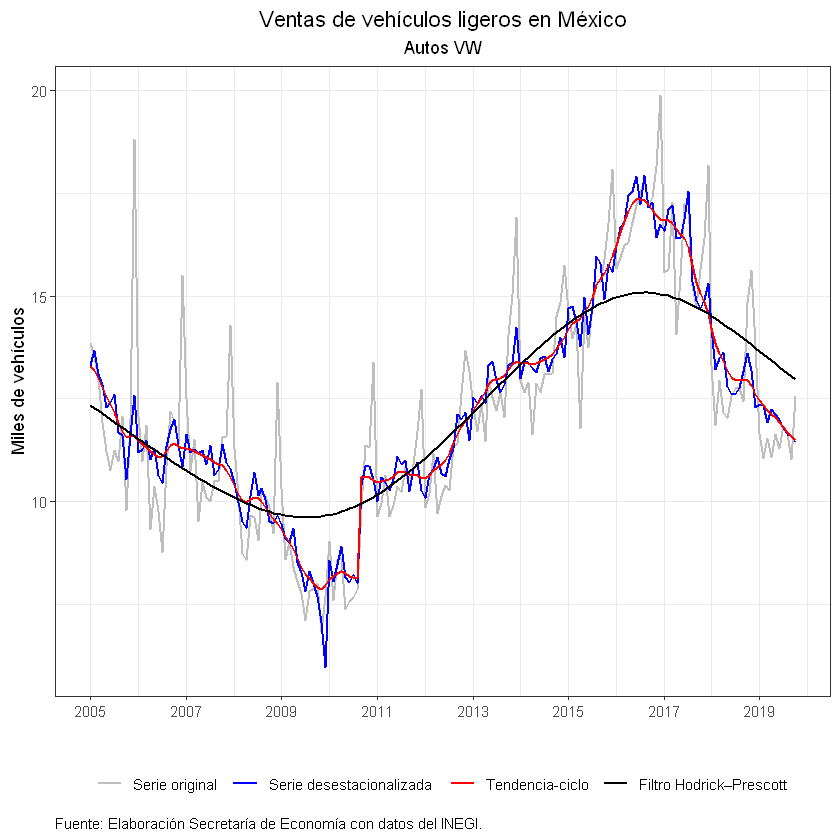

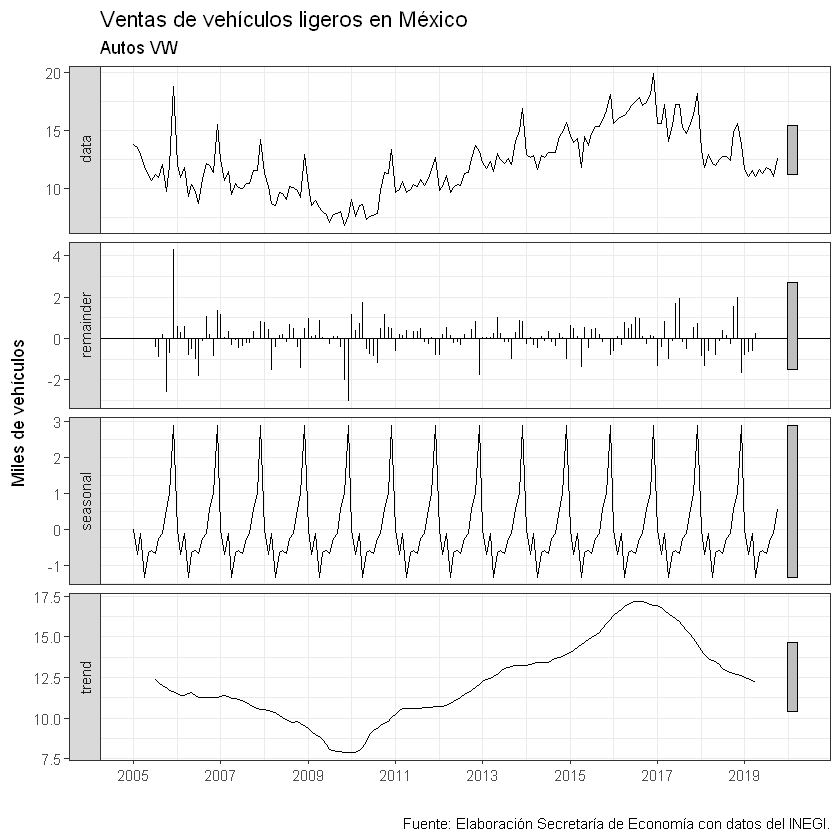

In [17]:
var <- "qv_vw"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos VW"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


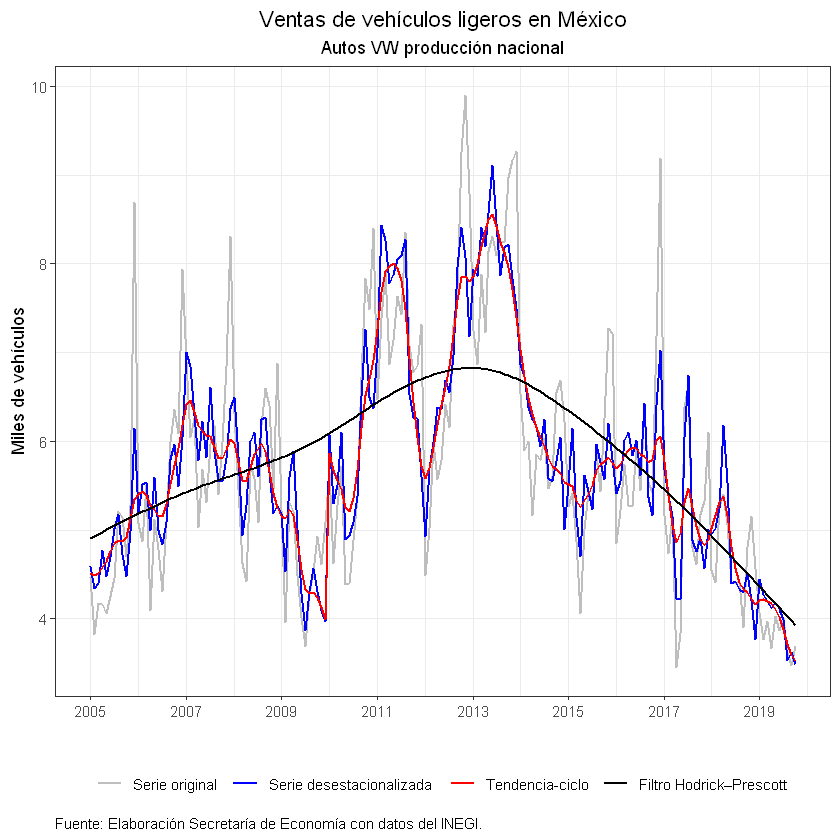

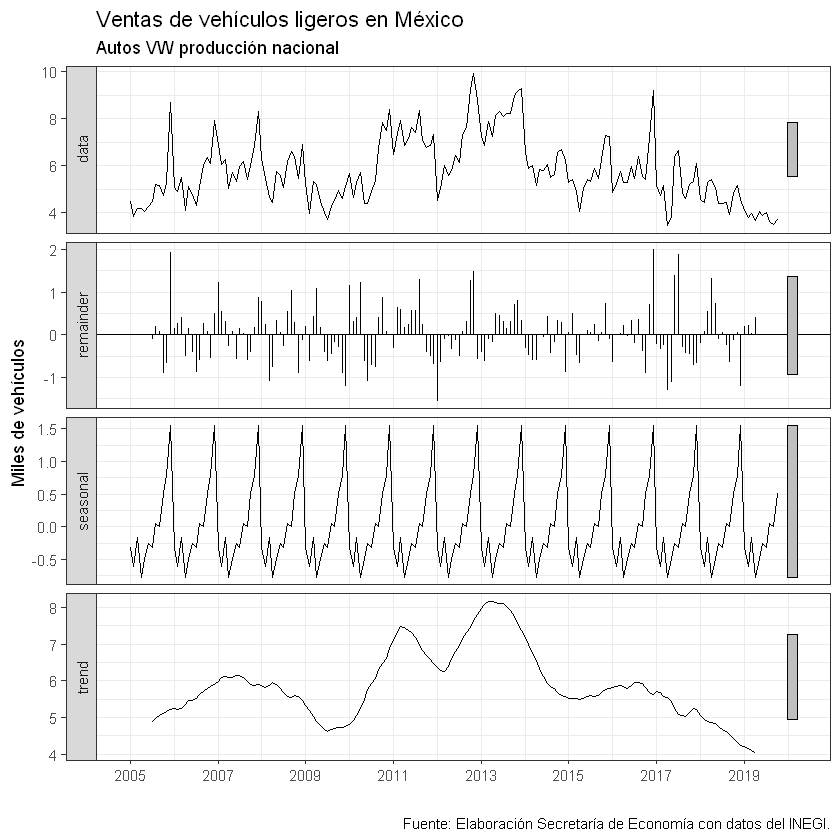

In [18]:
var <- "qv_vw_nal"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos VW producción nacional"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


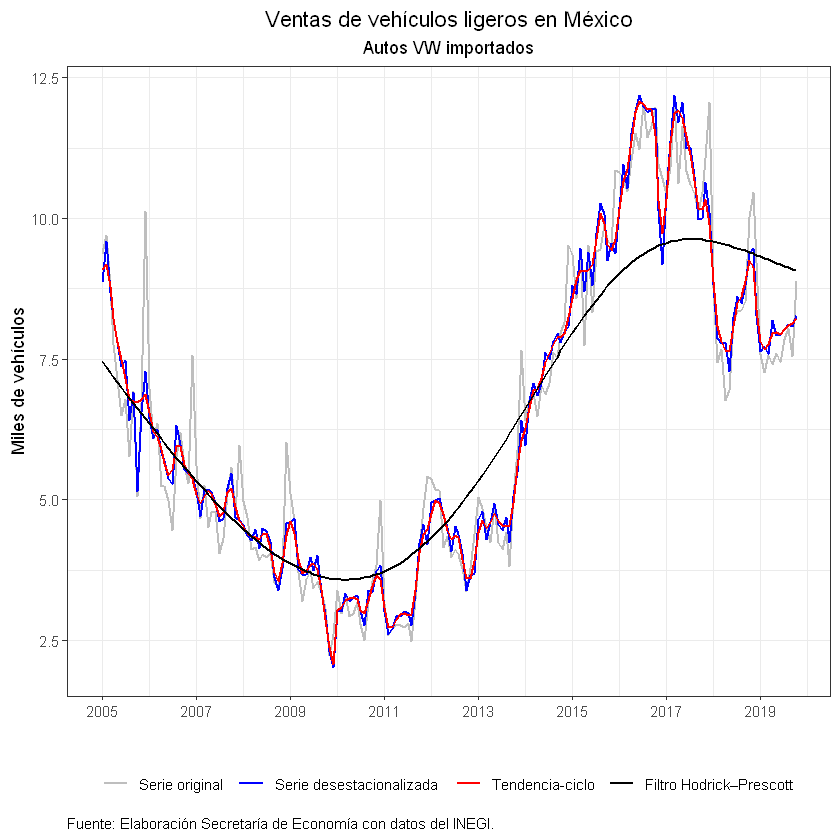

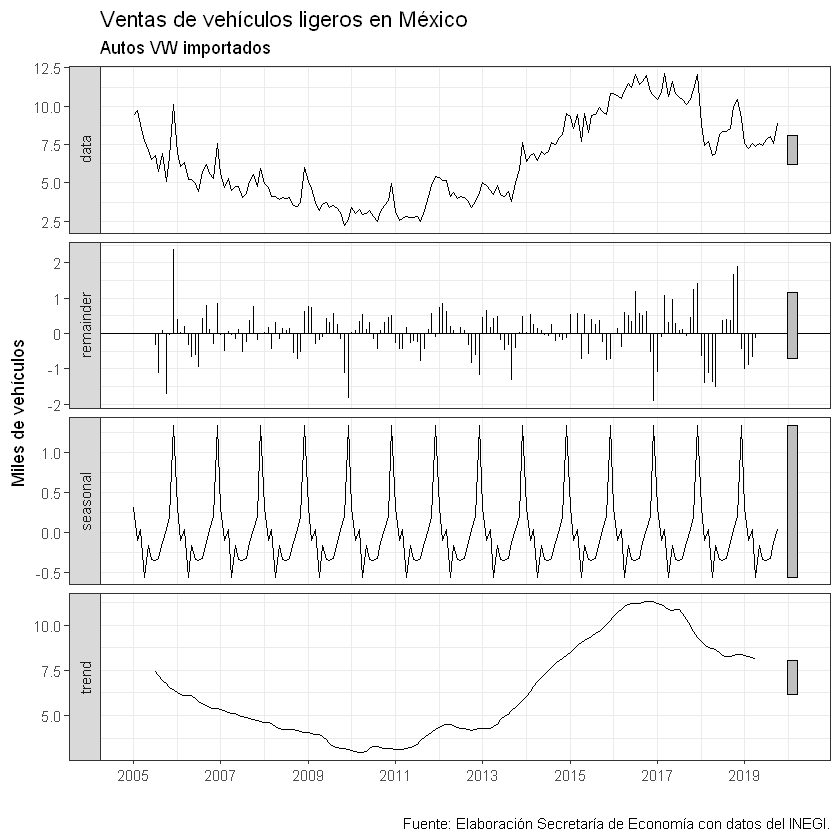

In [19]:
var <- "qv_vw_imp"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos VW importados"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


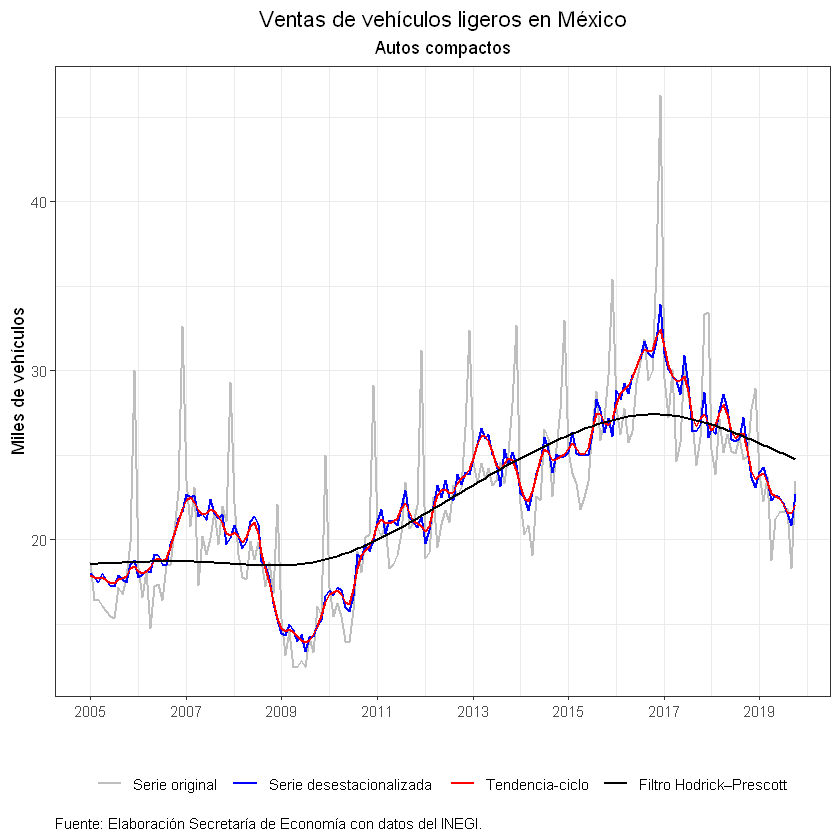

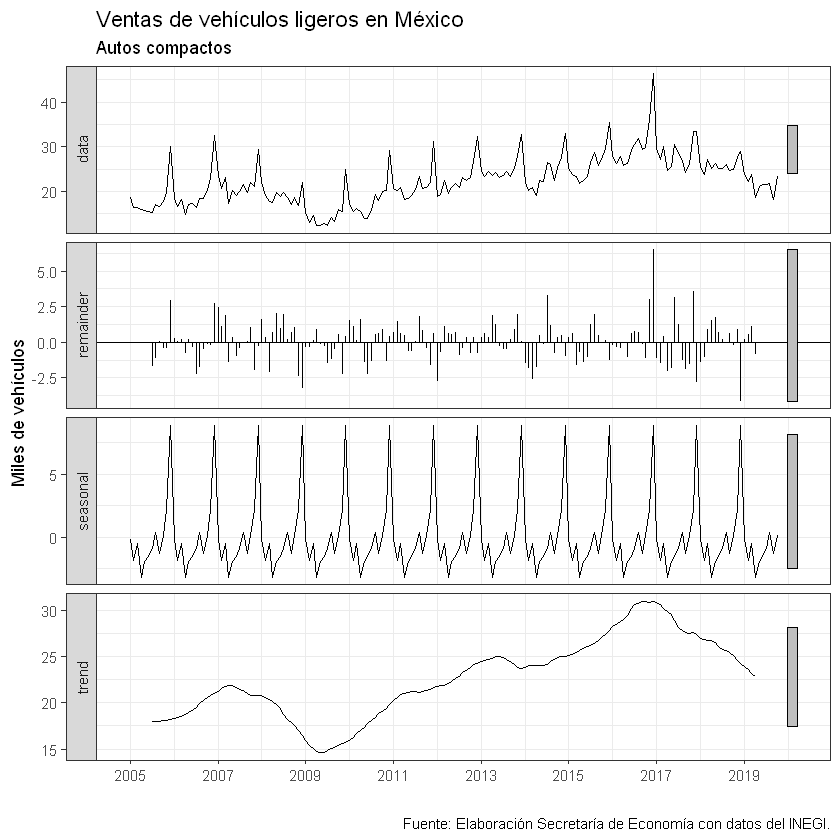

In [20]:
var <- "qv_1"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos compactos"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


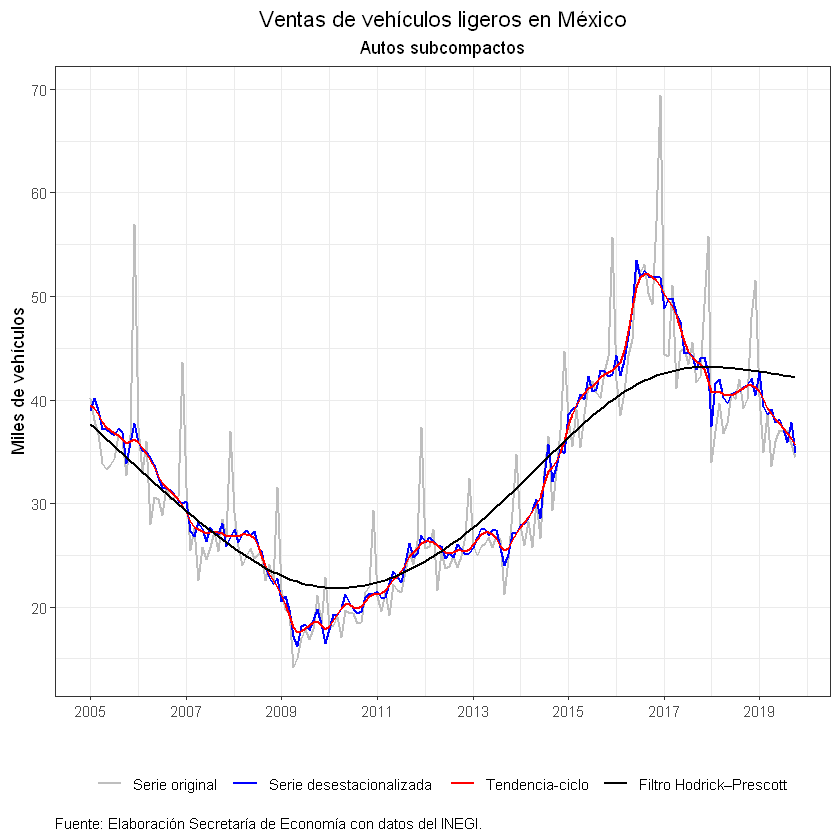

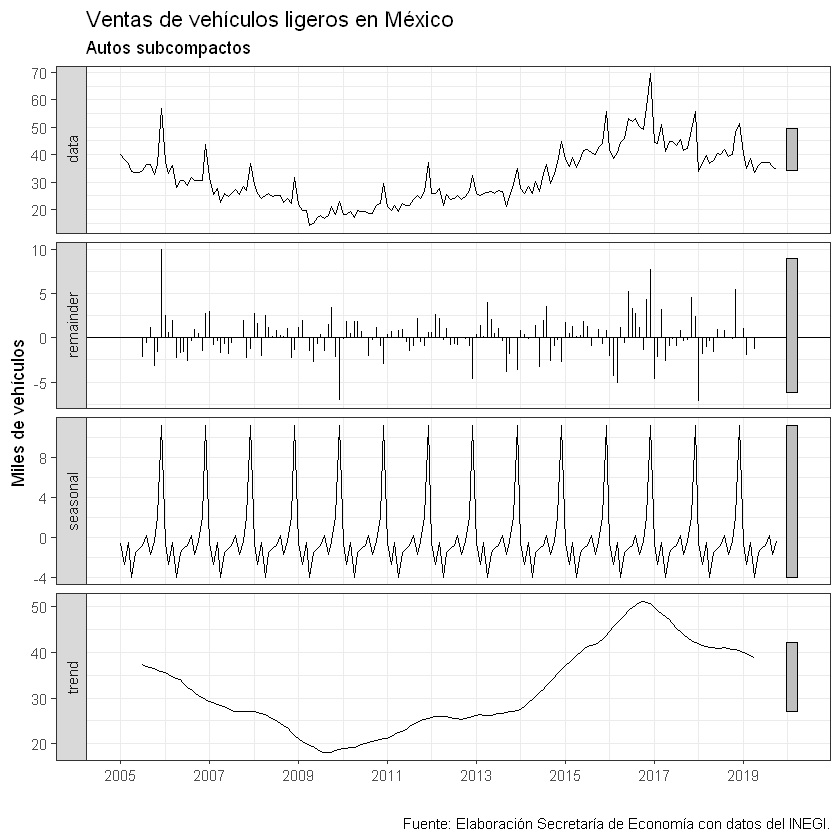

In [21]:
var <- "qv_2"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "Autos subcompactos"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


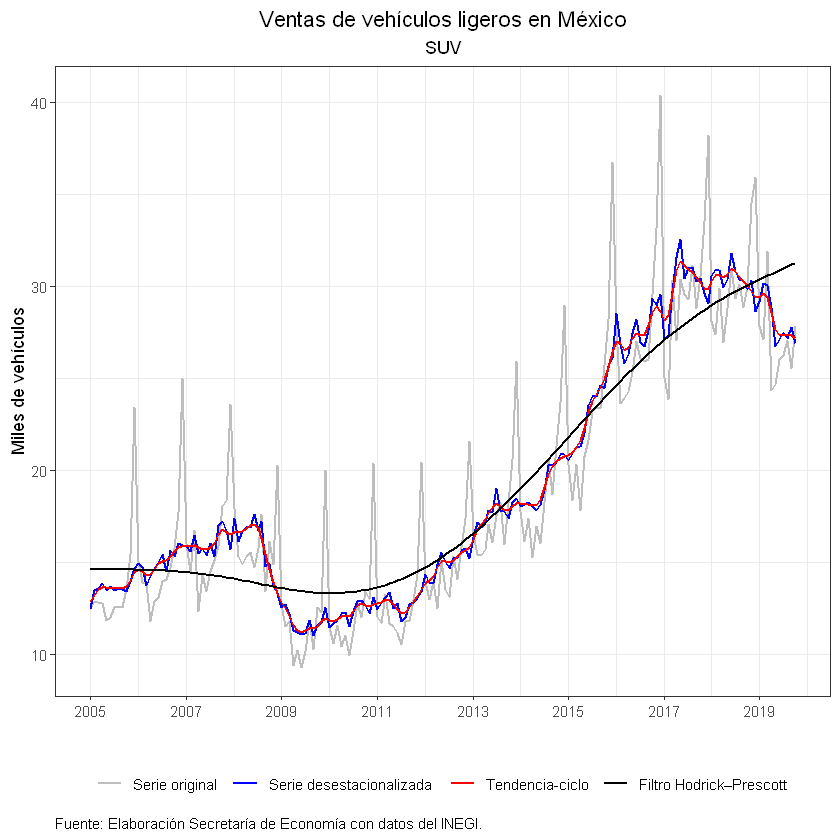

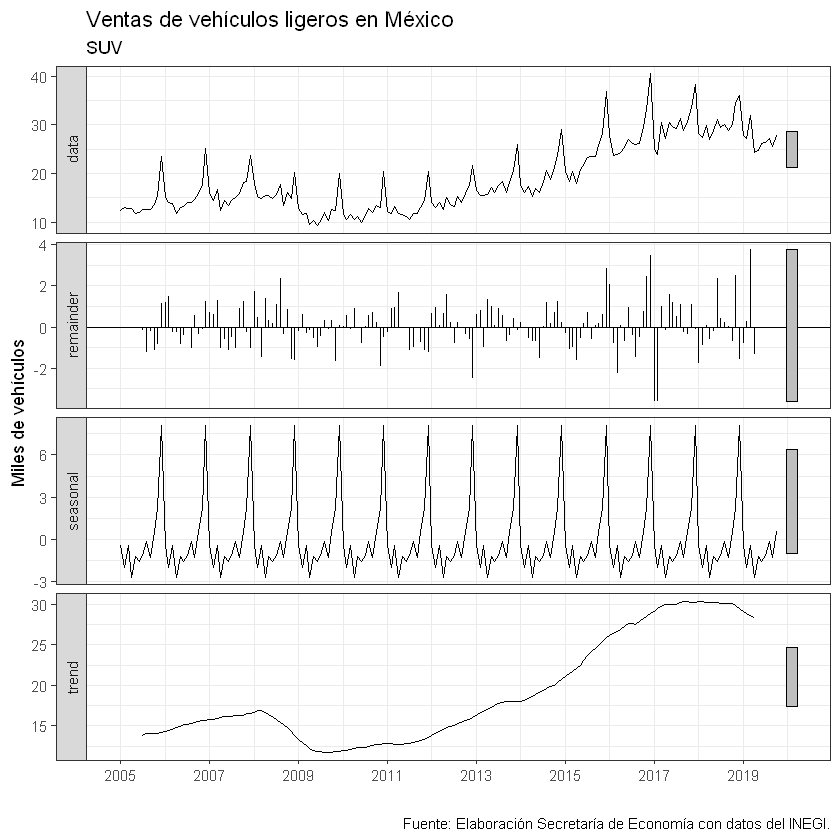

In [22]:
var <- "qv_7"
db <- wrk
vti <- "Ventas de vehículos ligeros en México"
vsub <- "SUV"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

## Producción de vehículos ligeros en México

[[1]]

[[2]]


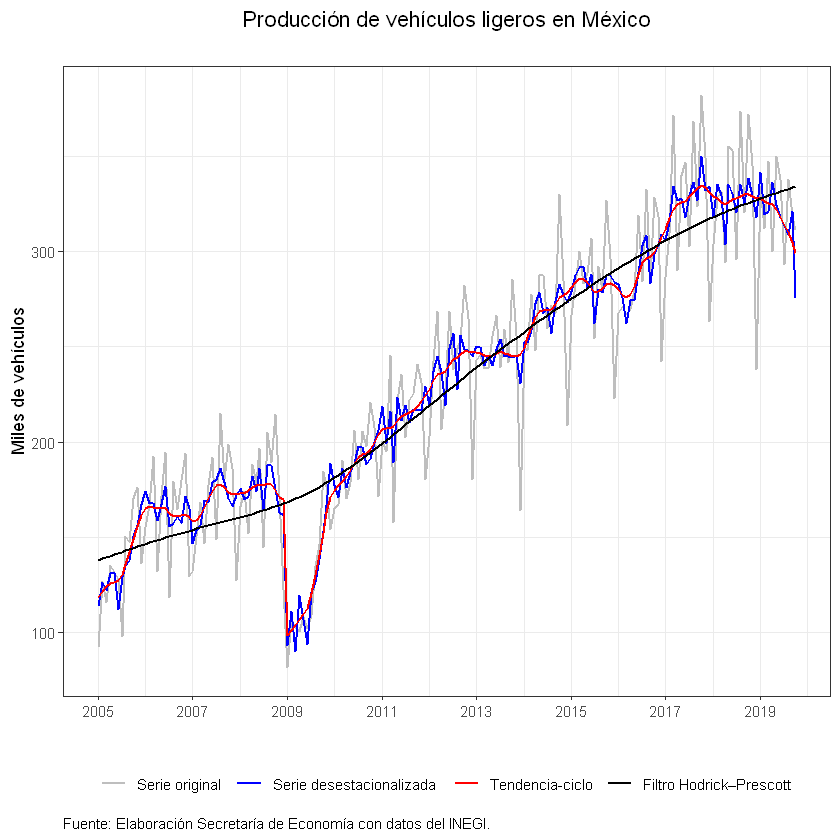

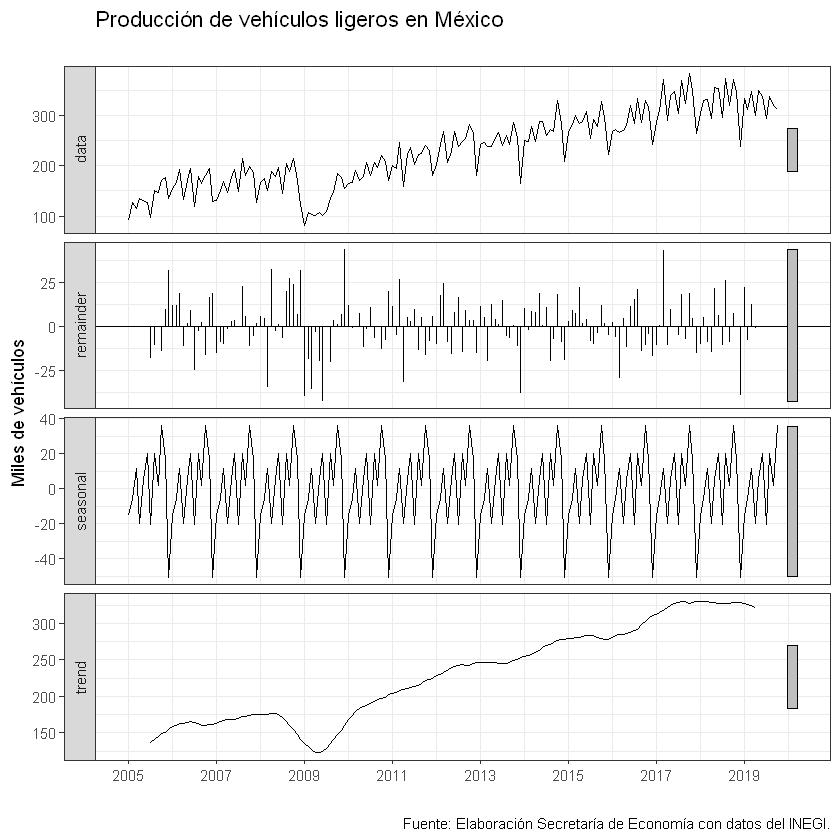

In [23]:
var <- "qp"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- ""
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


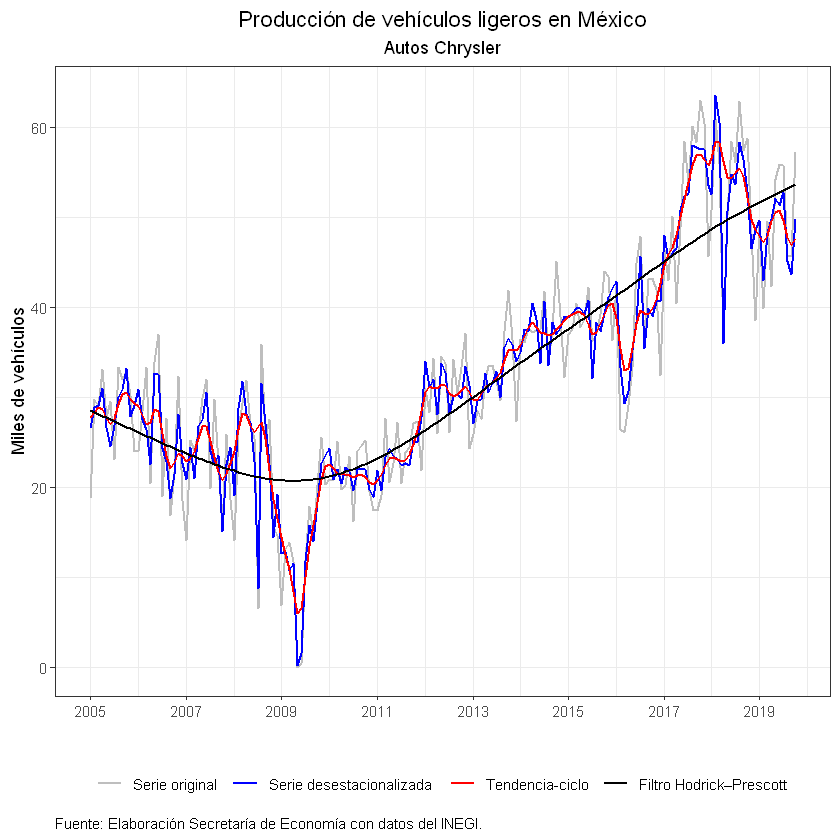

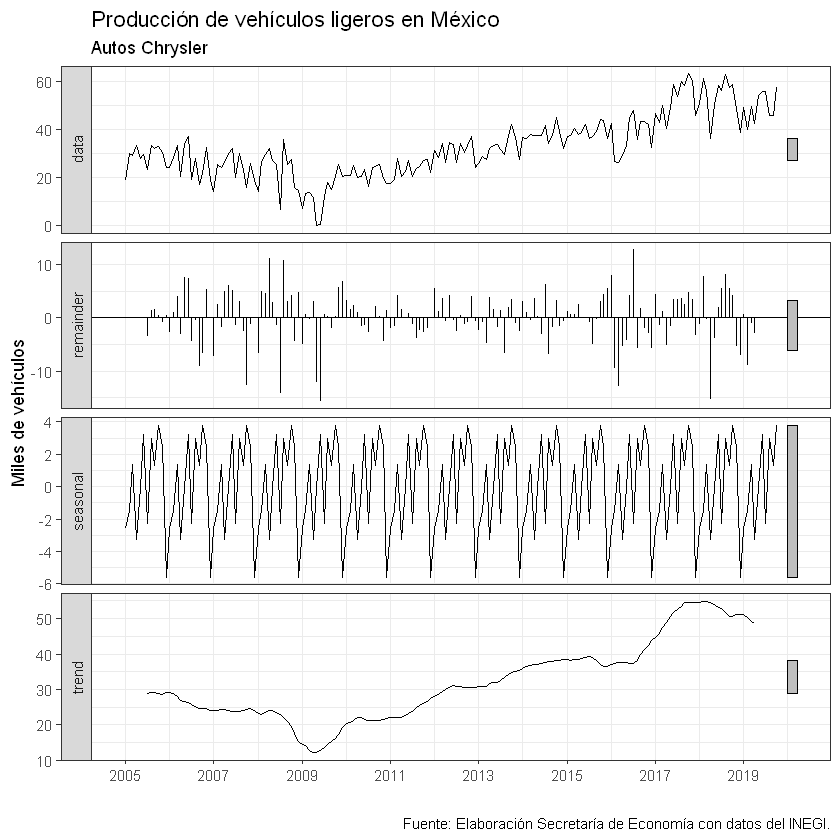

In [24]:
var <- "qp_fca"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- "Autos Chrysler"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


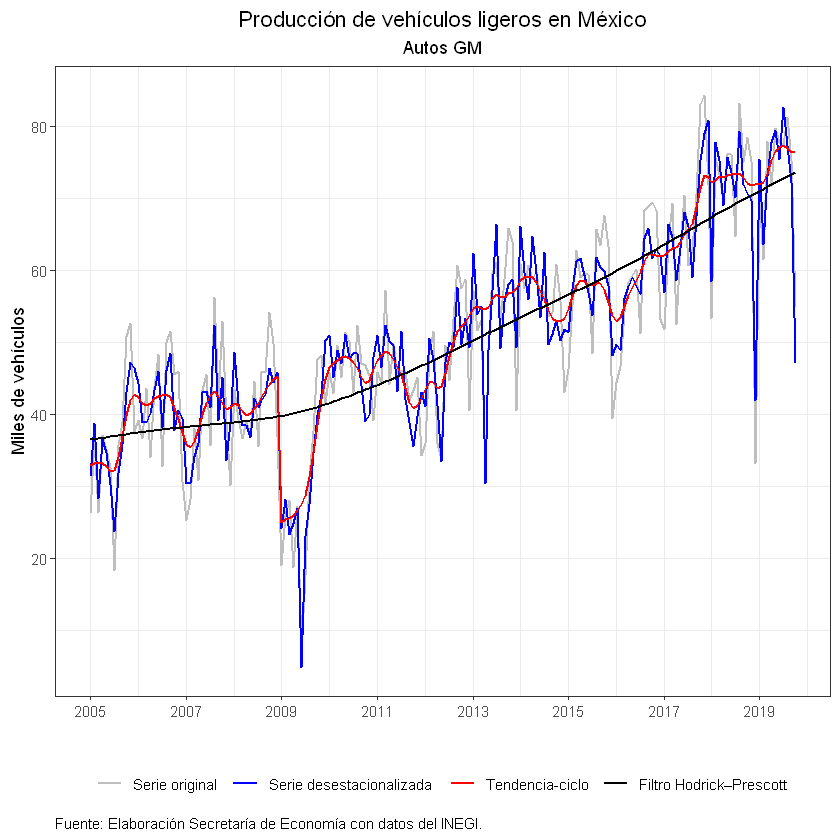

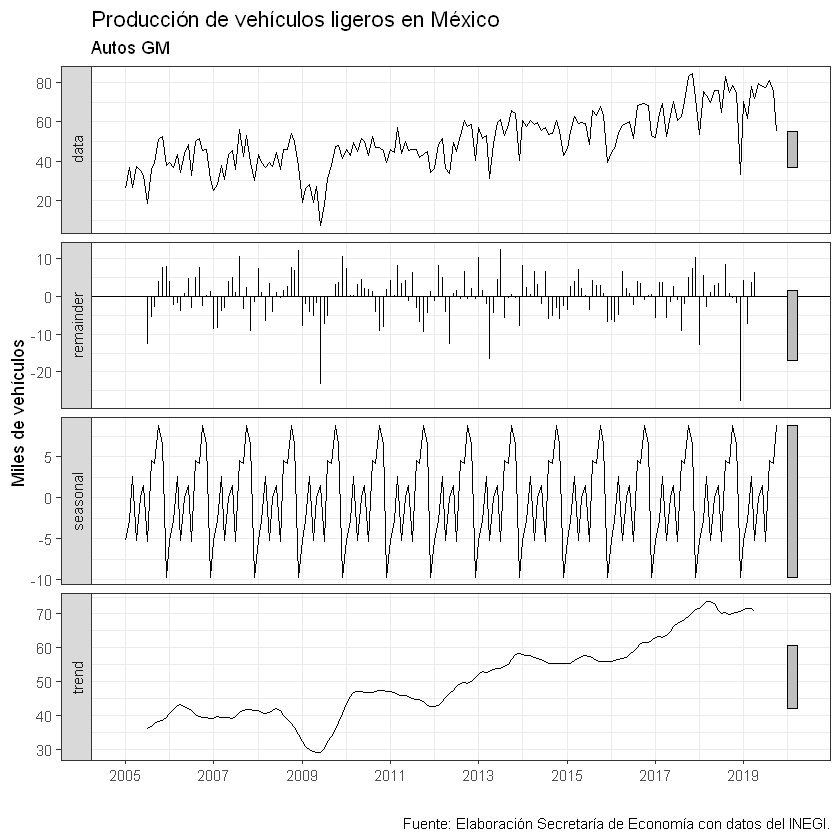

In [25]:
var <- "qp_gm"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- "Autos GM"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


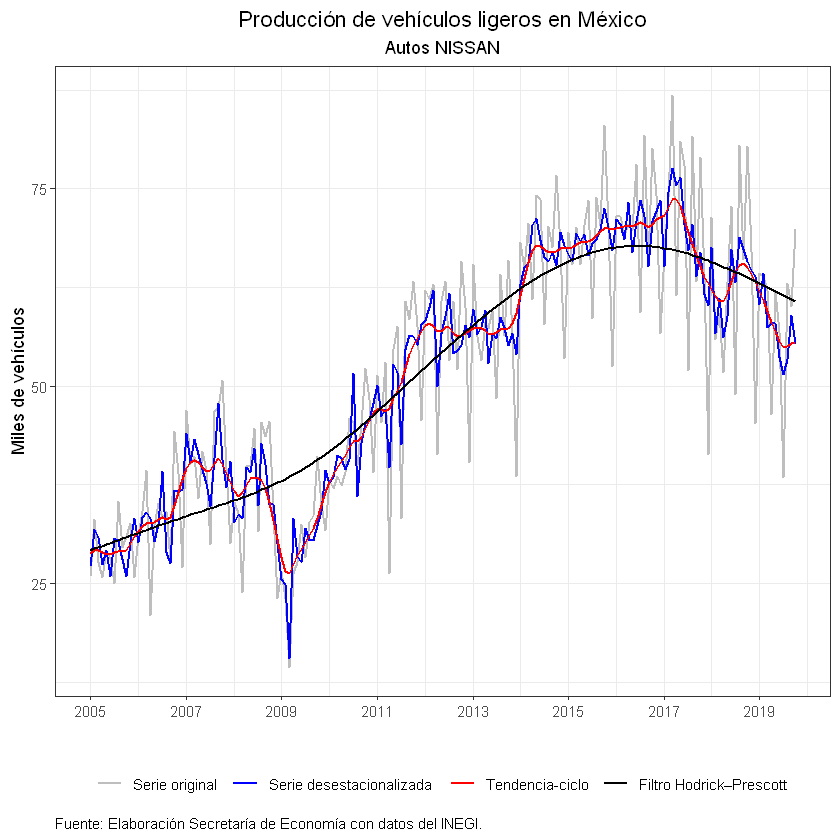

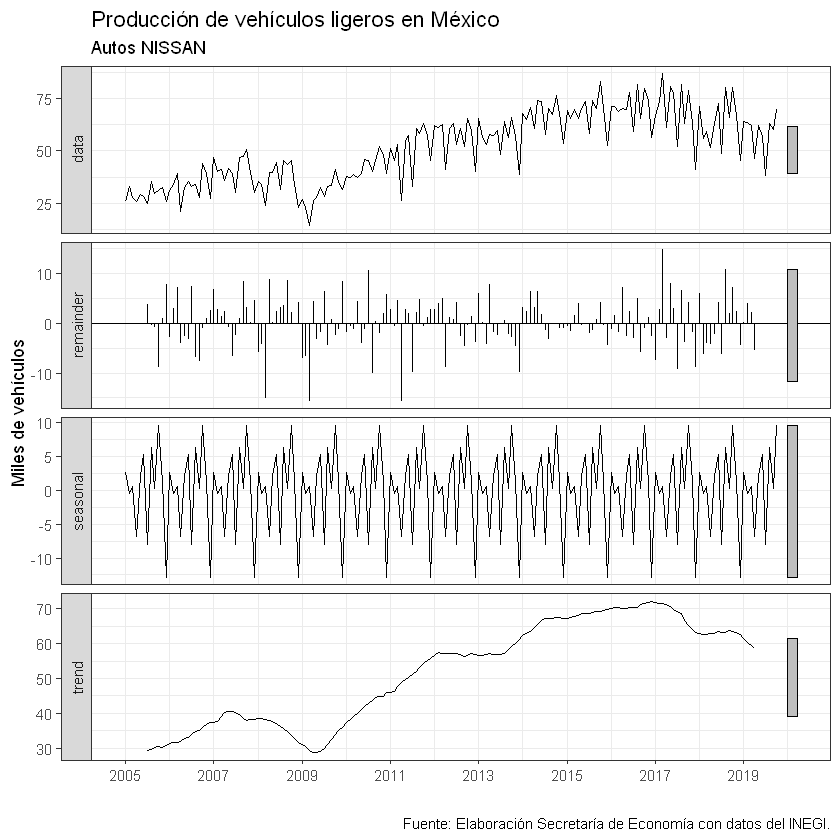

In [26]:
var <- "qp_nsa"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- "Autos NISSAN"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


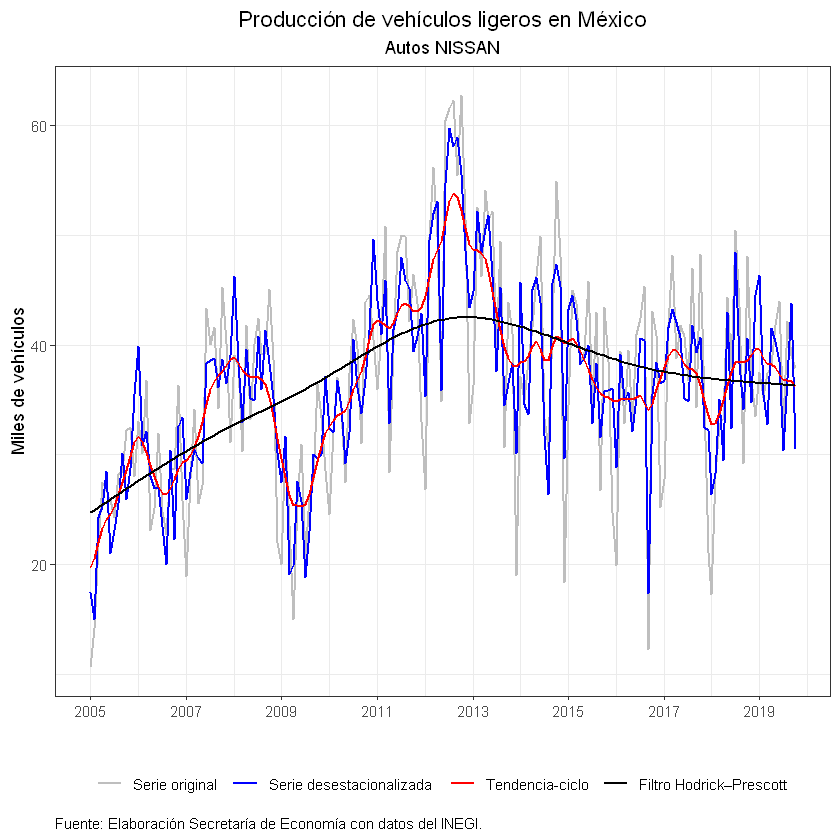

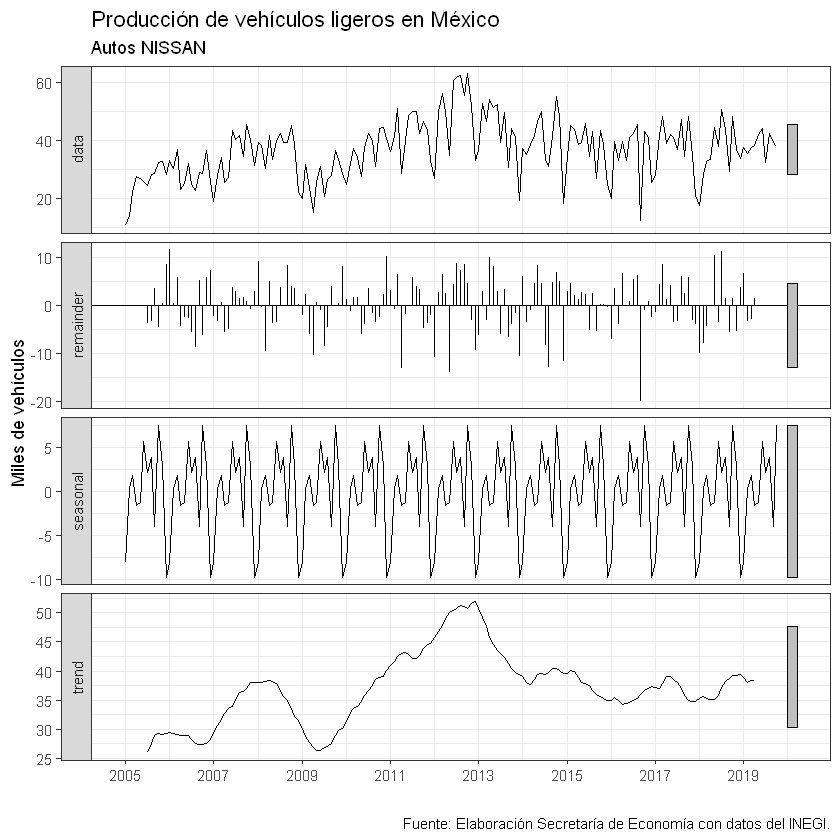

In [27]:
var <- "qp_vw"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- "Autos NISSAN"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


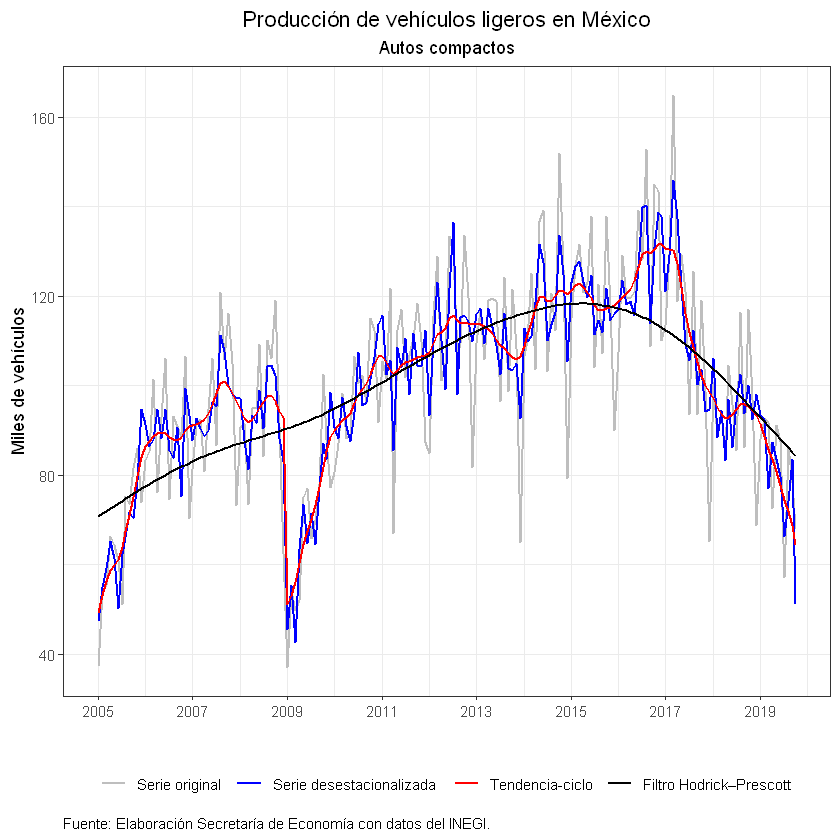

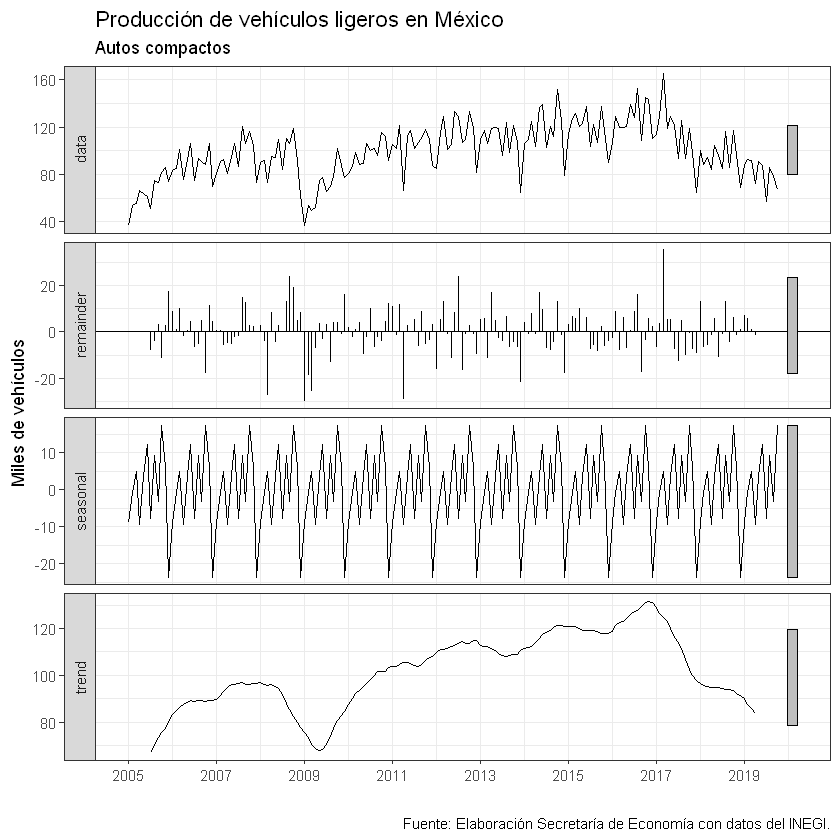

In [28]:
var <- "qp_1"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- "Autos compactos"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


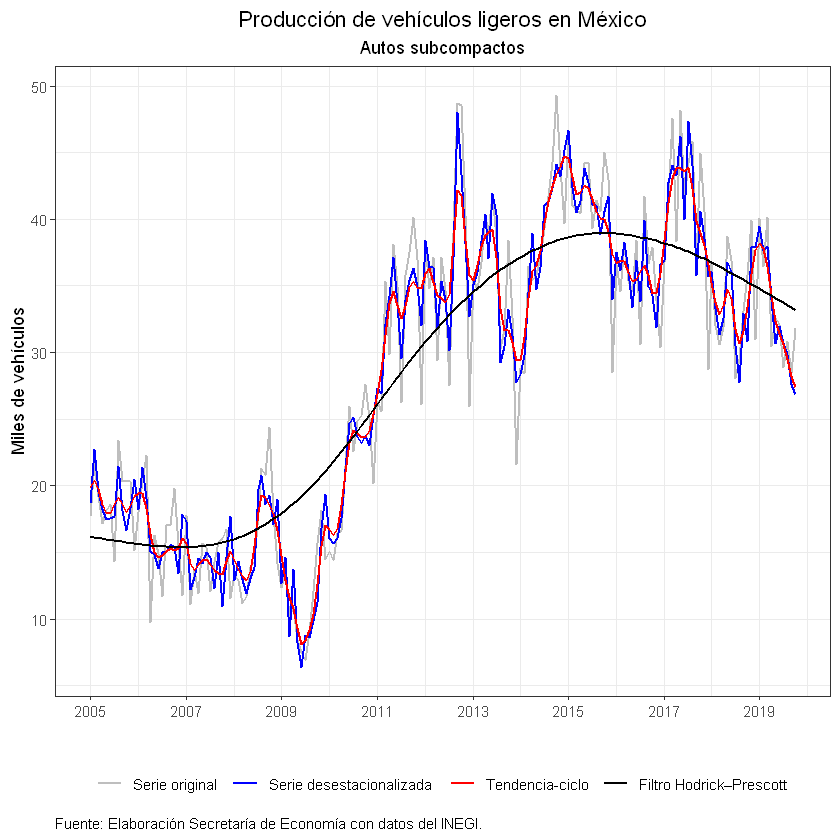

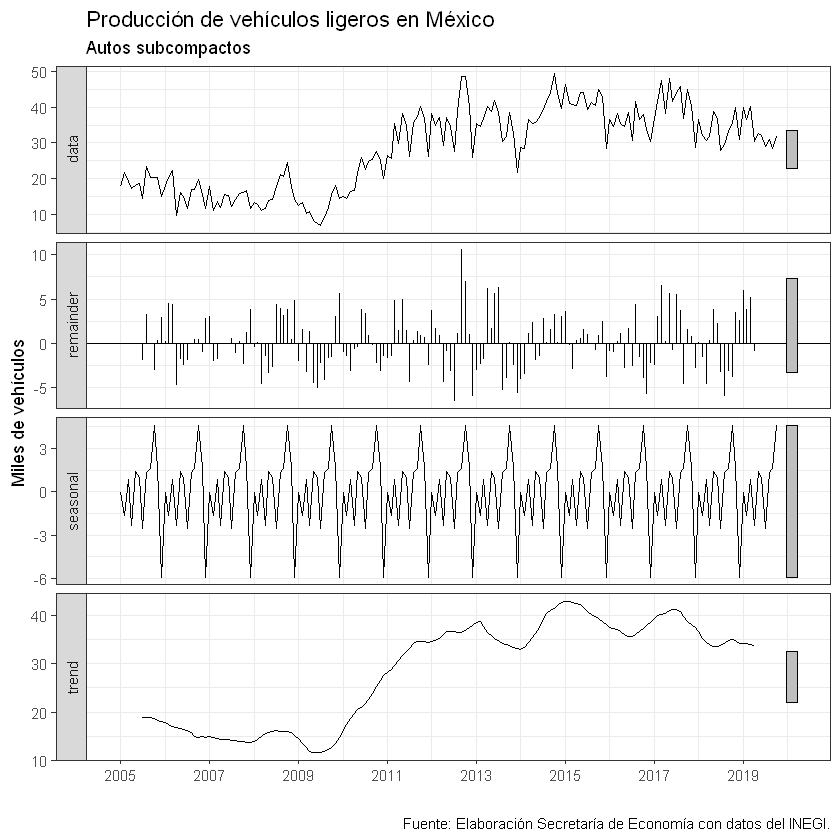

In [29]:
var <- "qp_2"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- "Autos subcompactos"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


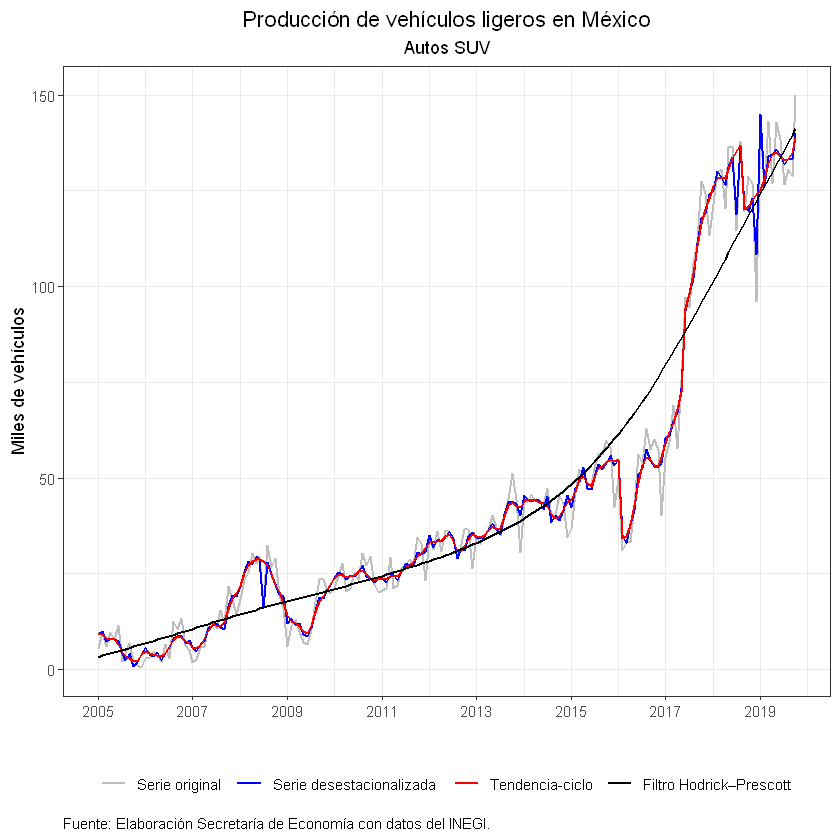

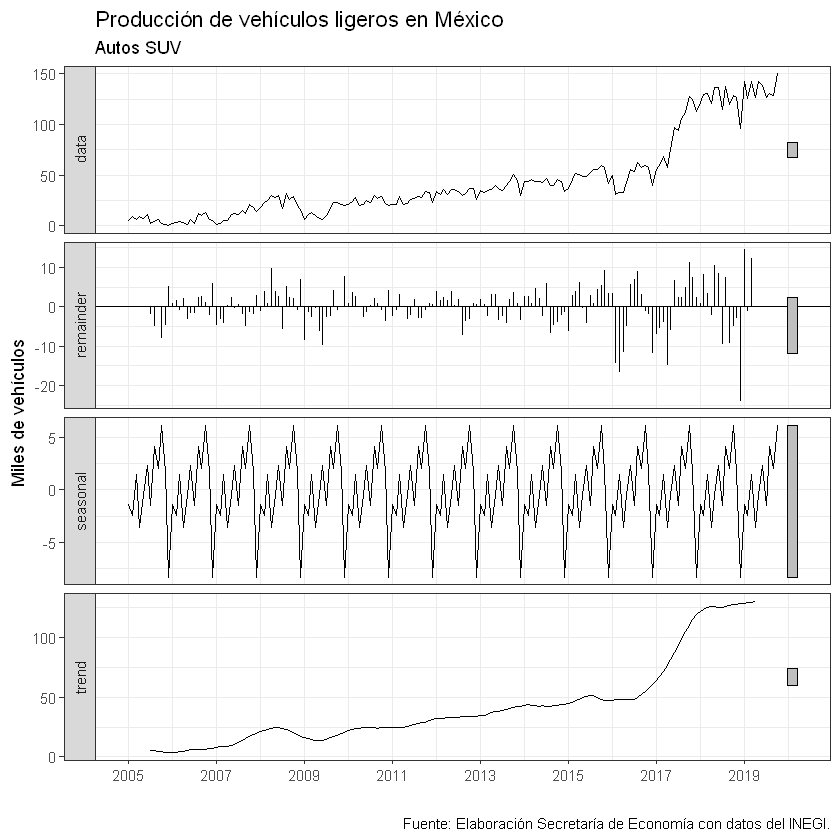

In [30]:
var <- "qp_7"
db <- wrk
vti <- "Producción de vehículos ligeros en México"
vsub <- "Autos SUV"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

## Exportación de vehículos ligeros en México

[[1]]

[[2]]


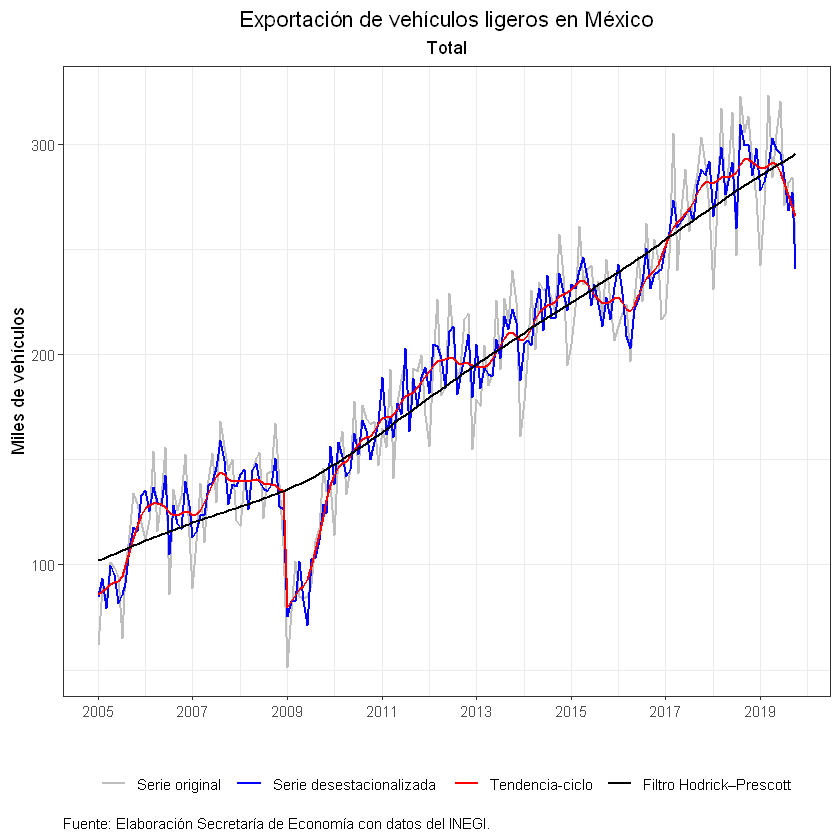

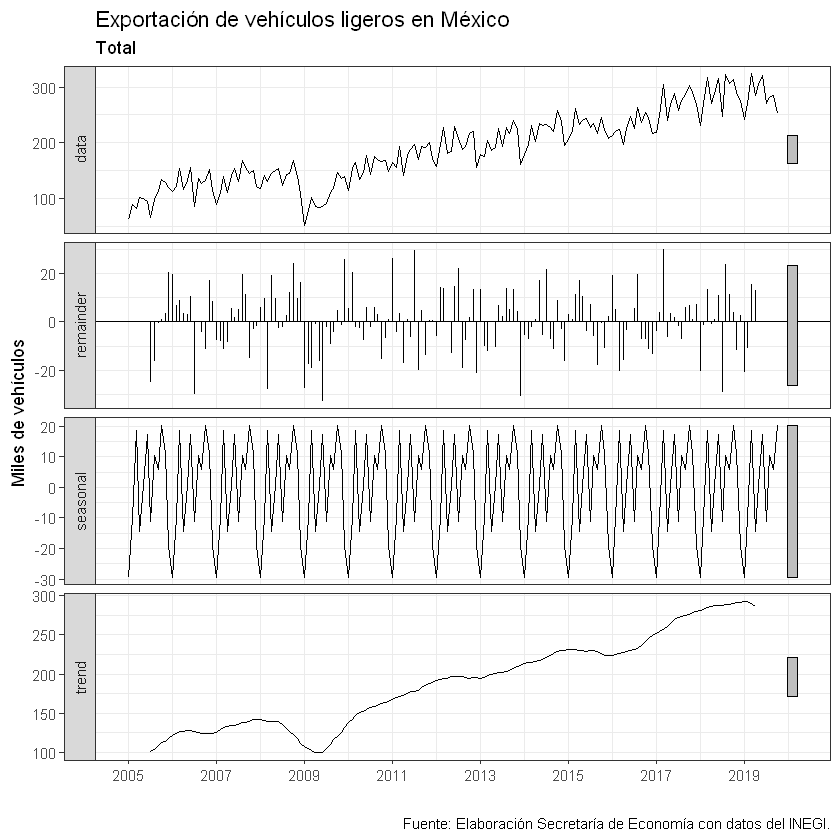

In [31]:
var <- "qx"
db <- wrk
vti <- "Exportación de vehículos ligeros en México"
vsub <- "Total"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


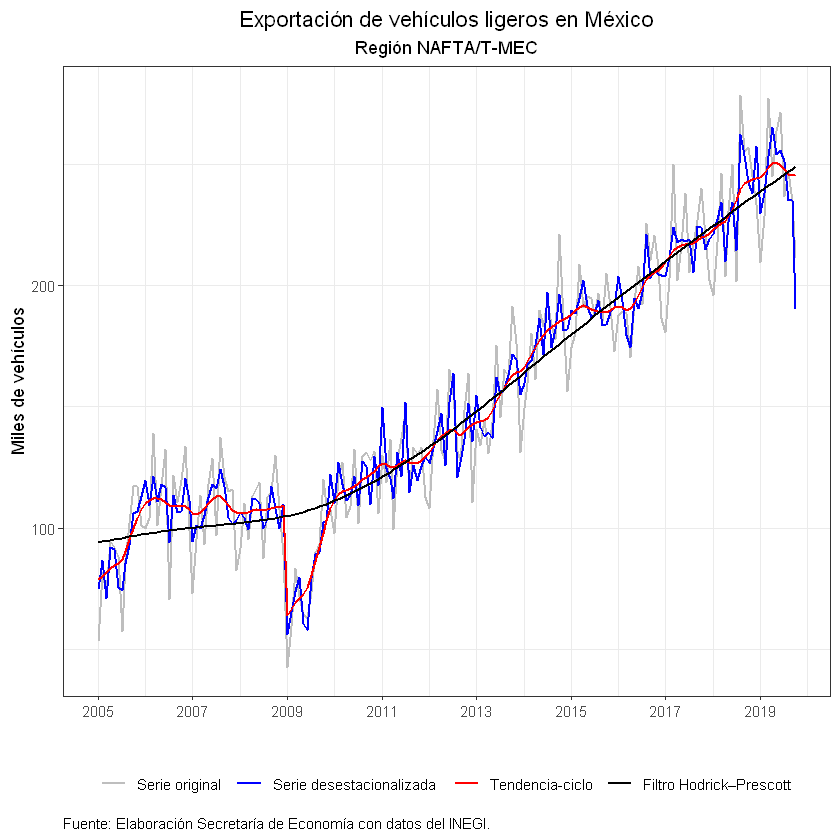

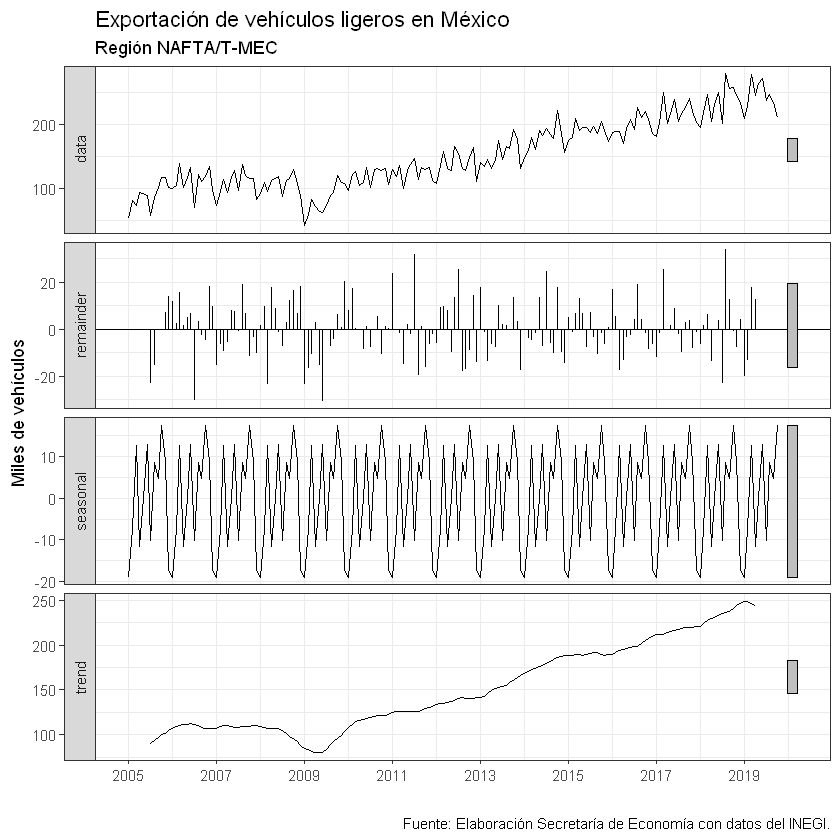

In [32]:
var <- "qx_nafta"
db <- wrk
vti <- "Exportación de vehículos ligeros en México"
vsub <- "Región NAFTA/T-MEC"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


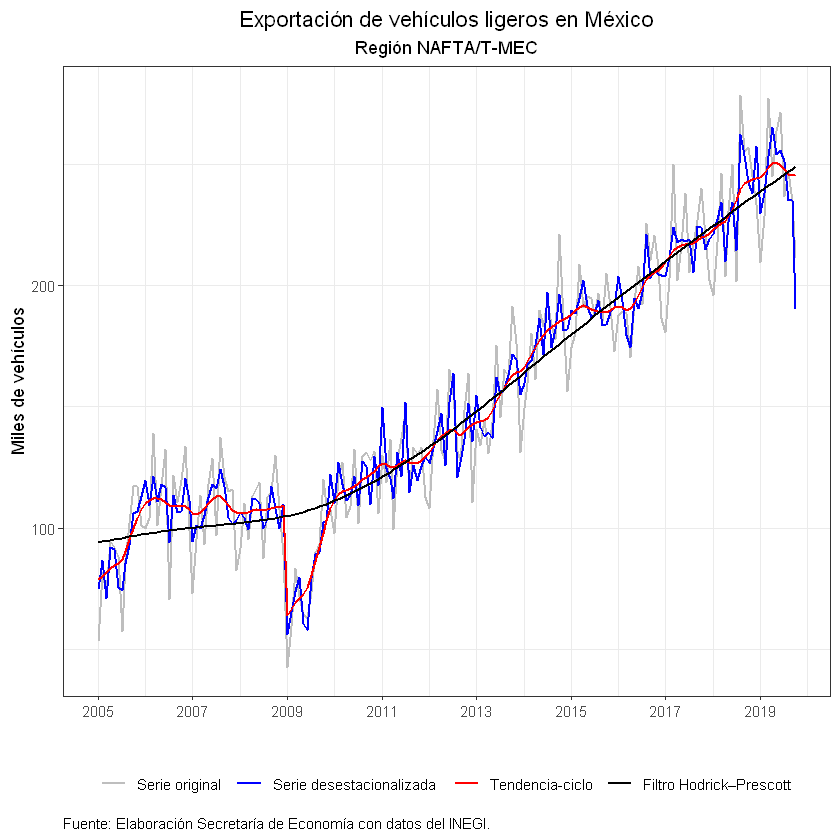

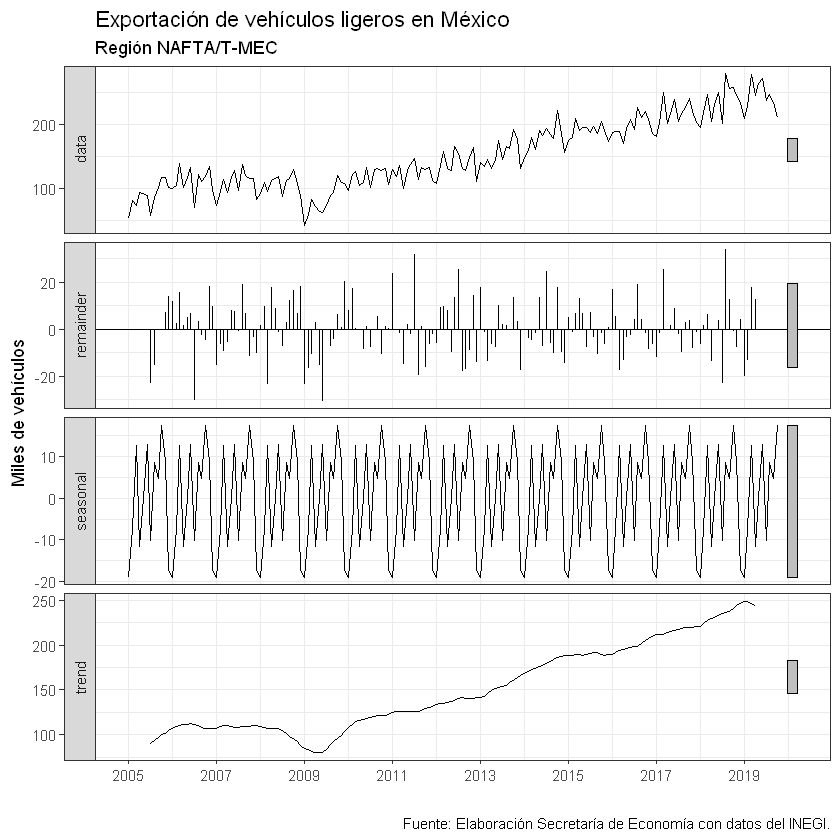

In [33]:
var <- "qx_nafta"
db <- wrk
vti <- "Exportación de vehículos ligeros en México"
vsub <- "Región NAFTA/T-MEC"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


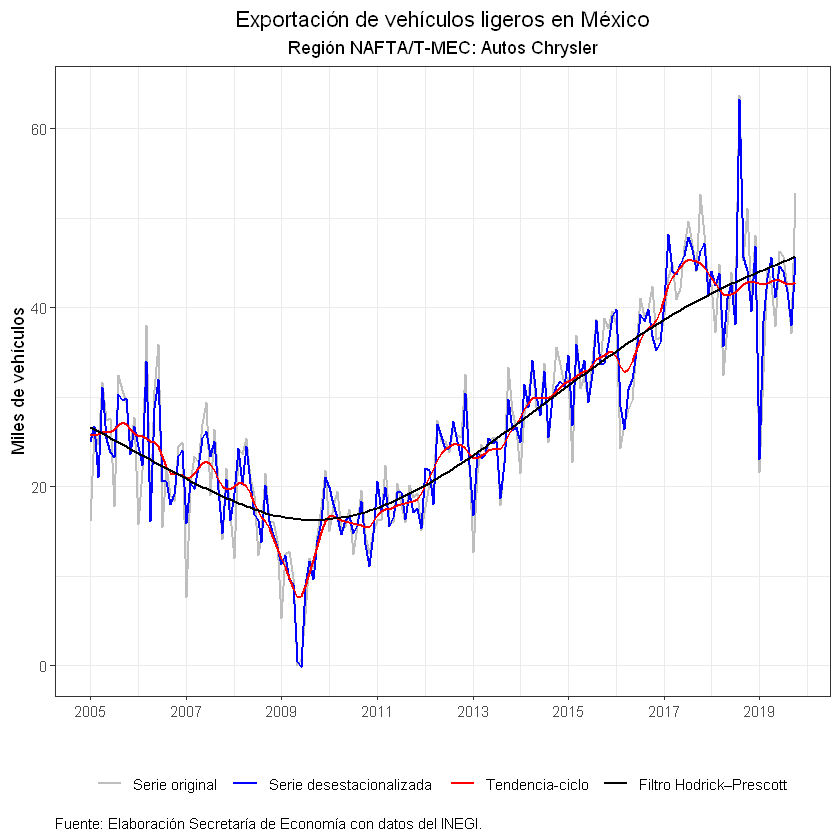

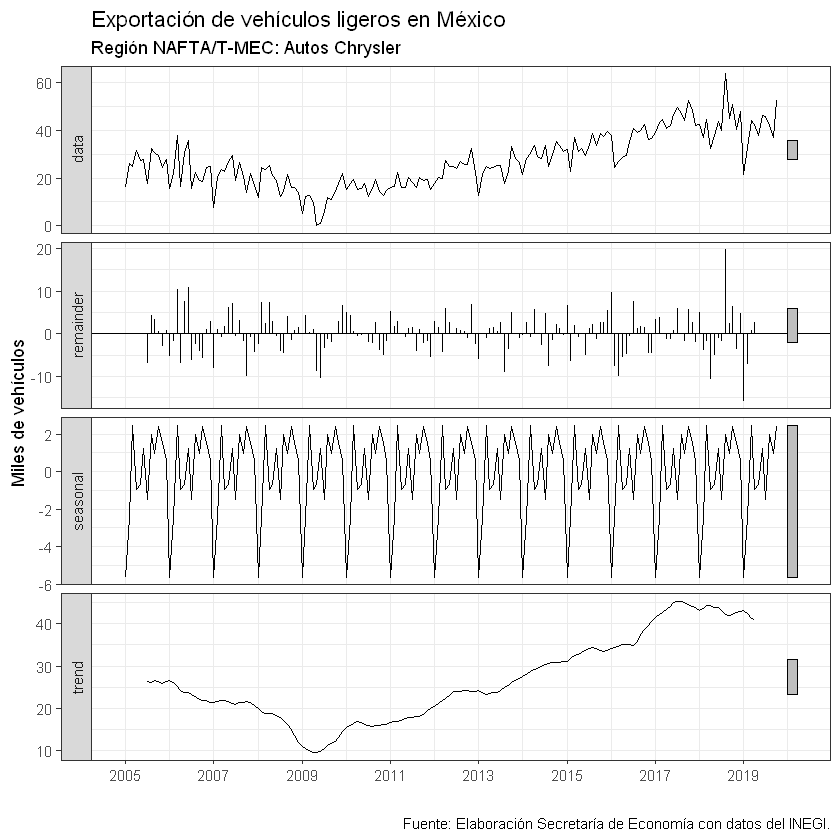

In [34]:
var <- "qx_nafta_fca"
db <- wrk
vti <- "Exportación de vehículos ligeros en México"
vsub <- "Región NAFTA/T-MEC: Autos Chrysler"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


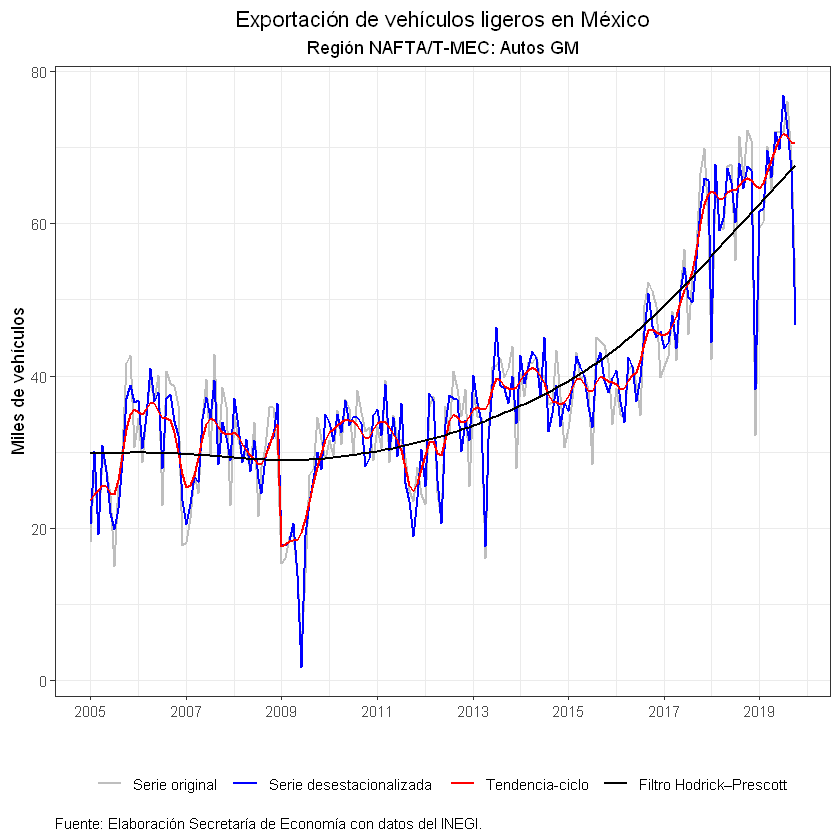

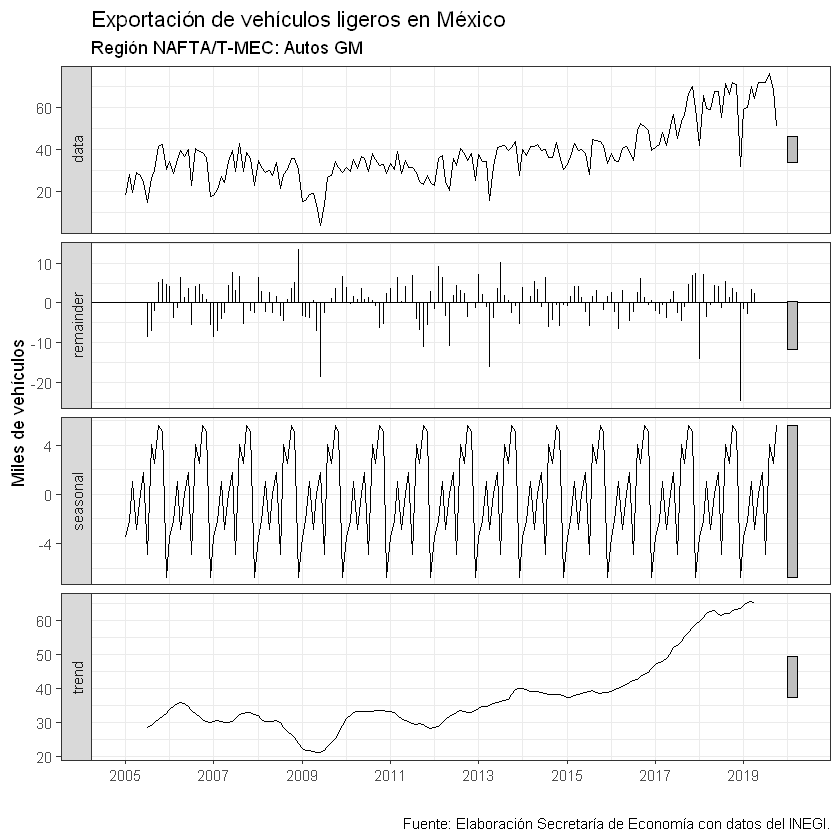

In [35]:
var <- "qx_nafta_gm"
db <- wrk
vti <- "Exportación de vehículos ligeros en México"
vsub <- "Región NAFTA/T-MEC: Autos GM"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)

[[1]]

[[2]]


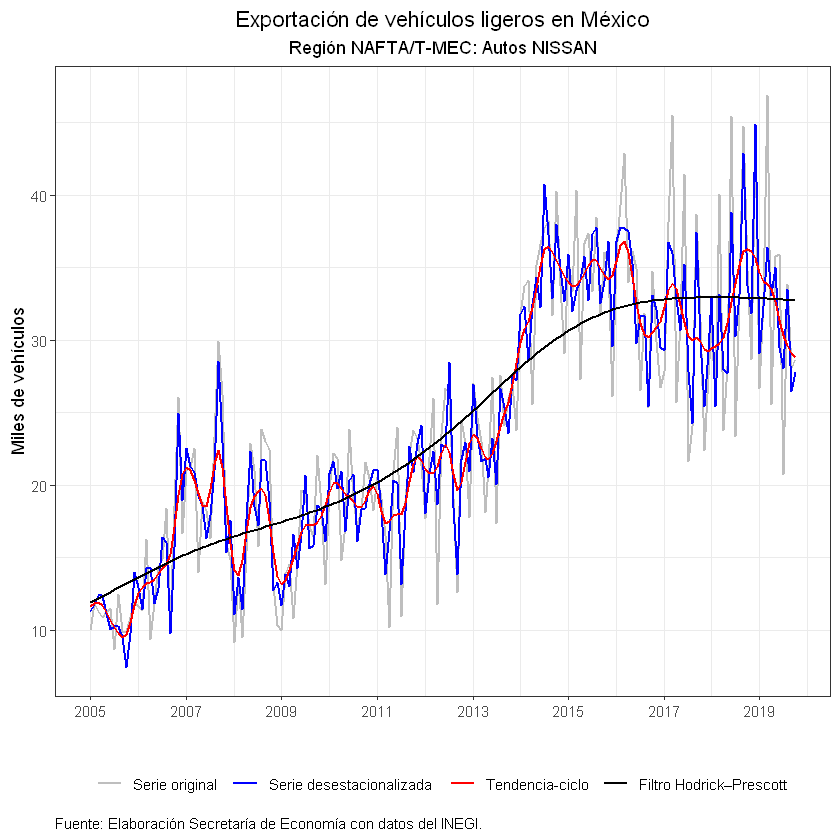

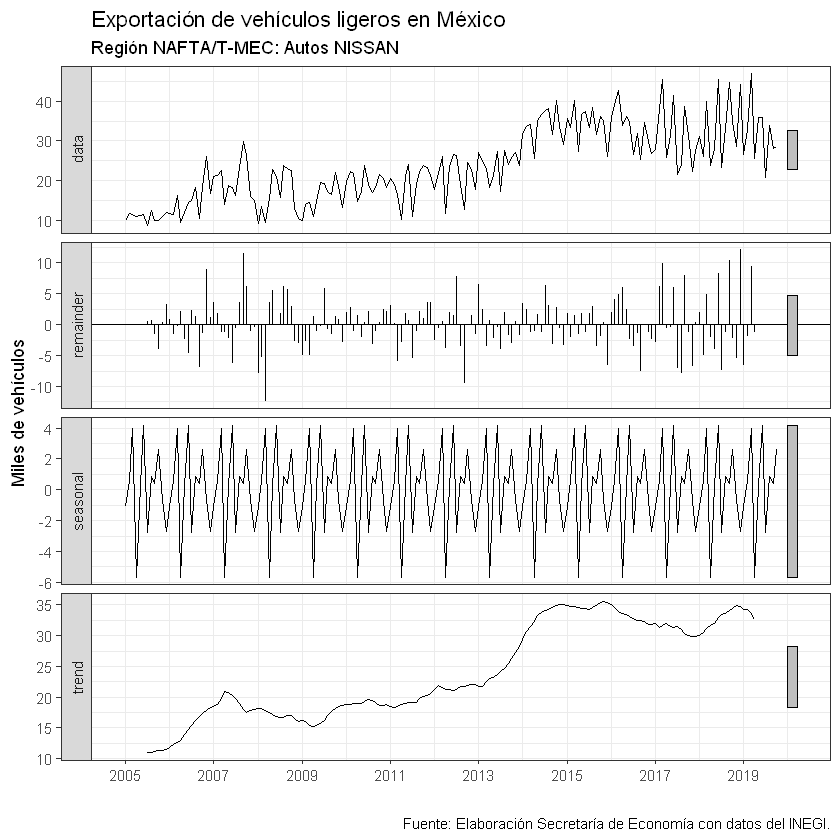

In [36]:
var <- "qx_nafta_nsa"
db <- wrk
vti <- "Exportación de vehículos ligeros en México"
vsub <- "Región NAFTA/T-MEC: Autos NISSAN"
vfuente <- "INEGI."
units <- 1000
vunits <- "Miles de vehículos"
autos_sa(var,db,vti,vsub,vfuente,units,vunits)